<div style=" background-color: RGB(9, 121, 105);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 6 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Analysez les ventes d'une librairie</h2>
</div>

<div style=" background-color: RGB(51, 153, 102);" >
<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Importation des librairies</h3>
</div>

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

import statsmodels.api as sm

<div style=" background-color: RGB(51, 153, 102);" >
<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Chargement des fichiers CSV</h3>
</div>

In [2]:
# Importation du fichier transactions nettoyé
transaction = pd.read_csv('Transactions.csv', sep=";")

# Importation du fichier produits nettoyé
customers = pd.read_csv('customers.csv', sep=";")

# Importation du fichier produits nettoyé
products = pd.read_csv('products.csv', sep=",")

<div style="background-color: RGB(11, 83, 69);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">I - Exploration des fichiers</h2>
</div>

In [3]:
### fonction pour decrire les tables
def description_table(data) :
    print('Le fichier clients comporte {} observation(s) ou article(s).'
      .format(data.shape[0]))
    print('Le fichier clients comporte {} colonne(s).'
          .format(data.shape[1]))
    print(data.nunique())
    print(f"\nY a-t-il des doublons : {data.duplicated().any()}")
    

In [4]:
### Table Clients
description_table(customers)

Le fichier clients comporte 8621 observation(s) ou article(s).
Le fichier clients comporte 3 colonne(s).
client_id    8621
sex             2
birth          76
dtype: int64

Y a-t-il des doublons : False


In [5]:
### Table produits
description_table(products)

Le fichier clients comporte 3286 observation(s) ou article(s).
Le fichier clients comporte 4 colonne(s).
Unnamed: 0    3286
id_prod       3286
price         1454
categ            3
dtype: int64

Y a-t-il des doublons : False


In [6]:
### Table transactions
description_table(transaction)

Le fichier clients comporte 687534 observation(s) ou article(s).
Le fichier clients comporte 4 colonne(s).
id_prod         3265
date          687419
session_id    345505
client_id       8600
dtype: int64

Y a-t-il des doublons : False


<div style="background-color: RGB(11, 83, 69);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">II - Jointure</h2>
</div>

<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 16px; color: RGB(34, 139, 34); "> Jointure entre clients et transactions</h3>
</div>

In [7]:
# Jointure entre customers et transactions
customers_transactions= pd.merge(customers, 
                        transaction, 
                        how="outer", 
                        on=('client_id'),
                        indicator = True)

#### jointure left_only

In [8]:
customers_transactions_left_only = customers_transactions.loc[customers_transactions["_merge"] == "left_only"]
print('Ci-dessous, la liste des clients qui n\'ont jamais effectué d\'achats sur le site, dont',
       customers_transactions_left_only.client_id.nunique(),'clients uniques.')
customers_transactions_left_only

Ci-dessous, la liste des clients qui n'ont jamais effectué d'achats sur le site, dont 21 clients uniques.


,client_id,sex,birth,id_prod,date,session_id,_merge
60134,c_8253,f,2001,NaN,NaN,NaN,left_only
202567,c_3789,f,1997,NaN,NaN,NaN,left_only
220670,c_4406,f,1998,NaN,NaN,NaN,left_only
222930,c_2706,f,1967,NaN,NaN,NaN,left_only
228157,c_3443,m,1959,NaN,NaN,NaN,left_only
251338,c_4447,m,1956,NaN,NaN,NaN,left_only
251898,c_3017,f,1992,NaN,NaN,NaN,left_only
264087,c_4086,f,1992,NaN,NaN,NaN,left_only
316669,c_6930,m,2004,NaN,NaN,NaN,left_only
323346,c_4358,m,1999,NaN,NaN,NaN,left_only


#### jointure right_only

In [9]:
customers_transactions_right_only = customers_transactions.loc[customers_transactions["_merge"] == "right_only"].reset_index()
print('En toute logique, il n\'y a aucun résultat ici car un client ne peut pas acheter sans un compte affilié et donc id.')
customers_transactions_right_only

En toute logique, il n'y a aucun résultat ici car un client ne peut pas acheter sans un compte affilié et donc id.


,index,client_id,sex,birth,id_prod,date,session_id,_merge


#### jointure both

In [10]:
customers_transactions_both = customers_transactions.loc[customers_transactions["_merge"] == "both"]
customers_transactions_both

,client_id,sex,birth,id_prod,date,session_id,_merge
0,c_4410,f,1967,1_483,2021-03-13 21:35:55.949042,s_5913,both
1,c_4410,f,1967,0_1111,2021-03-22 01:27:49.480137,s_9707,both
2,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707,both
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,both
4,c_4410,f,1967,0_1420,2021-03-22 22:31:25.825764,s_10092,both
...,...,...,...,...,...,...,...
687550,c_84,f,1982,0_1472,2022-05-14 00:24:49.391917,s_208110,both
687551,c_84,f,1982,0_1438,2022-05-29 06:11:50.316631,s_215697,both
687552,c_84,f,1982,1_459,2022-12-17 00:16:56.629536,s_313173,both
687553,c_84,f,1982,0_1104,2022-12-17 00:24:14.357525,s_313173,both


In [11]:
# Supprimer colonne "_merge" du df customers_transactions_both
customers_transactions_both.drop(['_merge'], axis=1, inplace = True)

C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\558464177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_transactions_both.drop(['_merge'], axis=1, inplace = True)


<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 16px; color: RGB(34, 139, 34); "> Jointure avec produits</h3>
</div>

In [12]:
products

,Unnamed: 0,id_prod,price,categ
0,0,0_1421,19.99,0
1,1,0_1368,5.13,0
2,2,0_731,17.99,0
3,3,1_587,4.99,1
4,4,0_1507,3.99,0
...,...,...,...,...
3281,3282,2_23,115.99,2
3282,3283,0_146,17.14,0
3283,3284,0_802,11.22,0
3284,3285,1_140,38.56,1


In [13]:
# Jointure entre products et transactions
data_melted = pd.merge(products, 
                        customers_transactions_both, 
                        how="outer", 
                        on='id_prod',
                       indicator = True)

#### jointure right_only

In [14]:
data_melted_right_only = data_melted.loc[data_melted["_merge"] == "right_only"]
data_melted_right_only.head()

,Unnamed: 0,id_prod,price,categ,client_id,sex,birth,date,session_id,_merge


#### jointure left_only

In [15]:
data_melted_left_only = data_melted.loc[data_melted["_merge"] == "left_only"].reset_index()
print('21 articles n\'ont jamais été vendus, dont', data_melted_left_only.id_prod.nunique(), 'articles unique.')
data_melted_left_only

21 articles n'ont jamais été vendus, dont 21 articles unique.


,index,Unnamed: 0,id_prod,price,categ,client_id,sex,birth,date,session_id,_merge
0,40239,184,0_1016,35.06,0,NaN,NaN,NaN,NaN,NaN,left_only
1,63699,279,0_1780,1.67,0,NaN,NaN,NaN,NaN,NaN,left_only
2,164799,737,0_1062,20.08,0,NaN,NaN,NaN,NaN,NaN,left_only
3,179776,794,0_1119,2.99,0,NaN,NaN,NaN,NaN,NaN,left_only
4,183506,811,0_1014,1.15,0,NaN,NaN,NaN,NaN,NaN,left_only
5,190426,846,1_0,31.82,1,NaN,NaN,NaN,NaN,NaN,left_only
6,233338,1031,0_1318,20.92,0,NaN,NaN,NaN,NaN,NaN,left_only
7,256575,1139,0_1800,22.05,0,NaN,NaN,NaN,NaN,NaN,left_only
8,293862,1347,0_1645,2.99,0,NaN,NaN,NaN,NaN,NaN,left_only
9,324662,1505,0_322,2.99,0,NaN,NaN,NaN,NaN,NaN,left_only


#### jointure both

In [16]:
data_merge = data_melted.loc[data_melted['_merge'] == 'both'].reset_index()
data_merge.head()

,index,Unnamed: 0,id_prod,price,categ,client_id,sex,birth,date,session_id,_merge
0,0,0,0_1421,19.99,0,c_5152,f,1986.0,2021-04-17 06:09:37.424812,s_21727,both
1,1,0,0_1421,19.99,0,c_2167,f,1960.0,2021-11-24 00:28:06.088699,s_124134,both
2,2,0,0_1421,19.99,0,c_2167,f,1960.0,2022-08-24 00:28:06.088699,s_257560,both
3,3,0,0_1421,19.99,0,c_3060,m,1971.0,2021-04-06 09:35:05.954975,s_16742,both
4,4,0,0_1421,19.99,0,c_3060,m,1971.0,2022-03-06 09:35:05.954975,s_175117,both


In [17]:
# Supprimer colonne "_merge" du df data_melted_both
data_merge.drop(['_merge'], axis=1, inplace = True)
data_merge.reset_index(inplace = True)
data_merge.drop(['level_0', 'index'], axis=1, inplace = True)

In [18]:
# Ajouter âge des clients au df
data = data_merge.assign(age = 2023 - data_merge.birth)

In [19]:
### description
description_table(data)

Le fichier clients comporte 687534 observation(s) ou article(s).
Le fichier clients comporte 10 colonne(s).
Unnamed: 0      3265
id_prod         3265
price           1442
categ              3
client_id       8600
sex                2
birth             76
date          687419
session_id    345505
age               76
dtype: int64

Y a-t-il des doublons : False


<div style="background-color: RGB(11, 83, 69);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">III - Analyse</h2>
</div>

In [20]:
# Determiner l'année de l'achat
data['annee_achat'] = data['date'].str[:4]

In [21]:
# convertir variables categ, age et birth en int pour supprimer les décimales inutiles
data = data.astype({'categ': str,'birth': int,'age': int, 'annee_achat' : int})

In [22]:
data_maj = data

In [23]:
# Mettre la date au format jj/mm/aaaa
data_maj['date'] = data_maj['date'].str[:10]

# Determiner l'âge du client au moment de l'achat
data_maj['age_achat'] = data_maj.annee_achat - data.birth

#Décomposer la date
data_maj['date'] = pd.to_datetime(data_maj['date'])
data_maj['jour'] = data_maj['date'].dt.day_name()
data_maj['date_mois'] = data_maj['date'].dt.strftime('%Y-%m')
data_maj['mois'] = data_maj['date'].dt.month_name()

In [24]:
data_maj.head()

,Unnamed: 0,id_prod,price,categ,client_id,sex,birth,date,session_id,age,annee_achat,age_achat,jour,date_mois,mois
0,0,0_1421,19.99,0,c_5152,f,1986,2021-04-17,s_21727,37,2021,35,Saturday,2021-04,April
1,0,0_1421,19.99,0,c_2167,f,1960,2021-11-24,s_124134,63,2021,61,Wednesday,2021-11,November
2,0,0_1421,19.99,0,c_2167,f,1960,2022-08-24,s_257560,63,2022,62,Wednesday,2022-08,August
3,0,0_1421,19.99,0,c_3060,m,1971,2021-04-06,s_16742,52,2021,50,Tuesday,2021-04,April
4,0,0_1421,19.99,0,c_3060,m,1971,2022-03-06,s_175117,52,2022,51,Sunday,2022-03,March


<div style="background-color: RGB(51, 153, 102);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">III.I - KPI</h2>
</div>

<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(34, 139, 34); "> Définition de fonctions</h3>
</div>

In [25]:
# Définir fonction de calcul 
def calcul_ca(dt, variable) :
    return pd.DataFrame(dt.groupby(variable).sum().reset_index())

In [26]:
# Définir fonction de calcul 
def calcul_volume_vente(dt,variable) :
    return pd.DataFrame(dt.groupby(variable).count().reset_index())

<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 16px; color: RGB(34, 139, 34); "> Distribution variable prix</h3>
</div>

<Figure size 2000x1500 with 0 Axes>

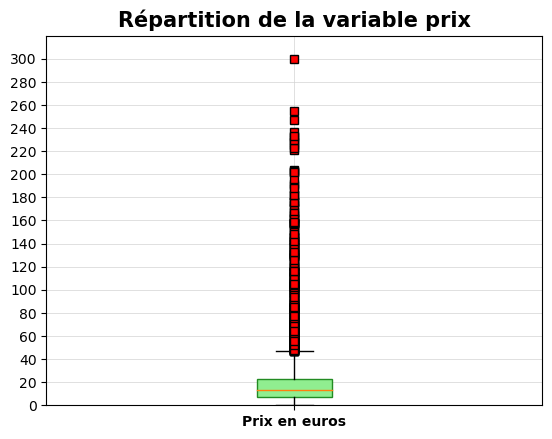

In [27]:
# BoxPlot de la variable prix
data_fig = products.price

fig5 = plt.figure(figsize=(20, 15))
red_square = dict(markerfacecolor='r', marker='s')
fig5, ax5 = plt.subplots()
ax5.boxplot(data_fig, vert=True, flierprops=red_square, patch_artist=True,
           boxprops=dict(facecolor='LightGreen', color='ForestGreen'))

ax5.set_title('Répartition de la variable prix', fontsize=15, 
              fontweight='bold')
plt.ylim(0, 320)
plt.yticks(np.arange(0, 320, step=20))
plt.xticks([1], ['Prix en euros'], fontsize=10, fontweight='bold')
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('boxplot_emp_prix.png', dpi=300, bbox_inches='tight')
plt.show()

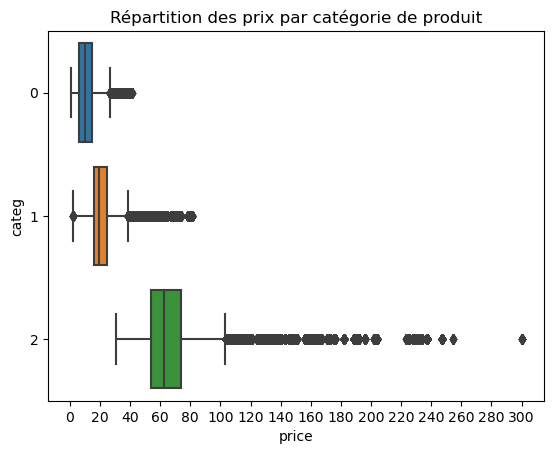

In [28]:
# Prix par categ
sns.boxplot(data=data_maj, x='price', y='categ', orient='h')
plt.title('Répartition des prix par catégorie de produit')
plt.xticks(np.arange(0, 310, step=20))
plt.savefig('repart_prix_categ.png', dpi=300, bbox_inches='tight')
plt.show()

On remarque que la distribution des prix est étalée à droite, et qu'il semble y avoir beaucoup d'outliers. Or, si on regarde le dernier boxplot, on se rends compte que la variable prix est distribuée en fonction de la catégorie de produit, la catégorie 0 étant la moins chère et la catégorie 2 ayant des prix beaucoup plus élevées mais sur une plus grande fourchette. On peut donc conclure qu'il n'y a pas d'outliers mais qu'il doit s'agir de différents types de livre (livres d'art, romans, ...).

<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 16px; color: RGB(34, 139, 34); "> CA global</h3>
</div>

In [29]:
# Calcul du chiffre d’affaires global
ca_global = data_maj.price.sum()
print('le CA global depuis le lancement du site est de', round(ca_global,2), '€.')

ca_an = calcul_ca(data_maj,[data_maj['annee_achat']])
ca_an = ca_an[['annee_achat','price']]
ca_an

le CA global depuis le lancement du site est de 12027663.1 €.


C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2179605359.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return pd.DataFrame(dt.groupby(variable).sum().reset_index())


,annee_achat,price
0,2021,4944760.98
1,2022,6108681.81
2,2023,974220.31


<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 16px; color: RGB(34, 139, 34); "> CA par mois</h3>
</div>

C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2179605359.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return pd.DataFrame(dt.groupby(variable).sum().reset_index())
C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2555655025.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Le CA mensuel moyen est de', round(ca_mensuel.mean(),2), '€.')


Le CA mensuel moyen est de price    501152.63
dtype: float64 €.


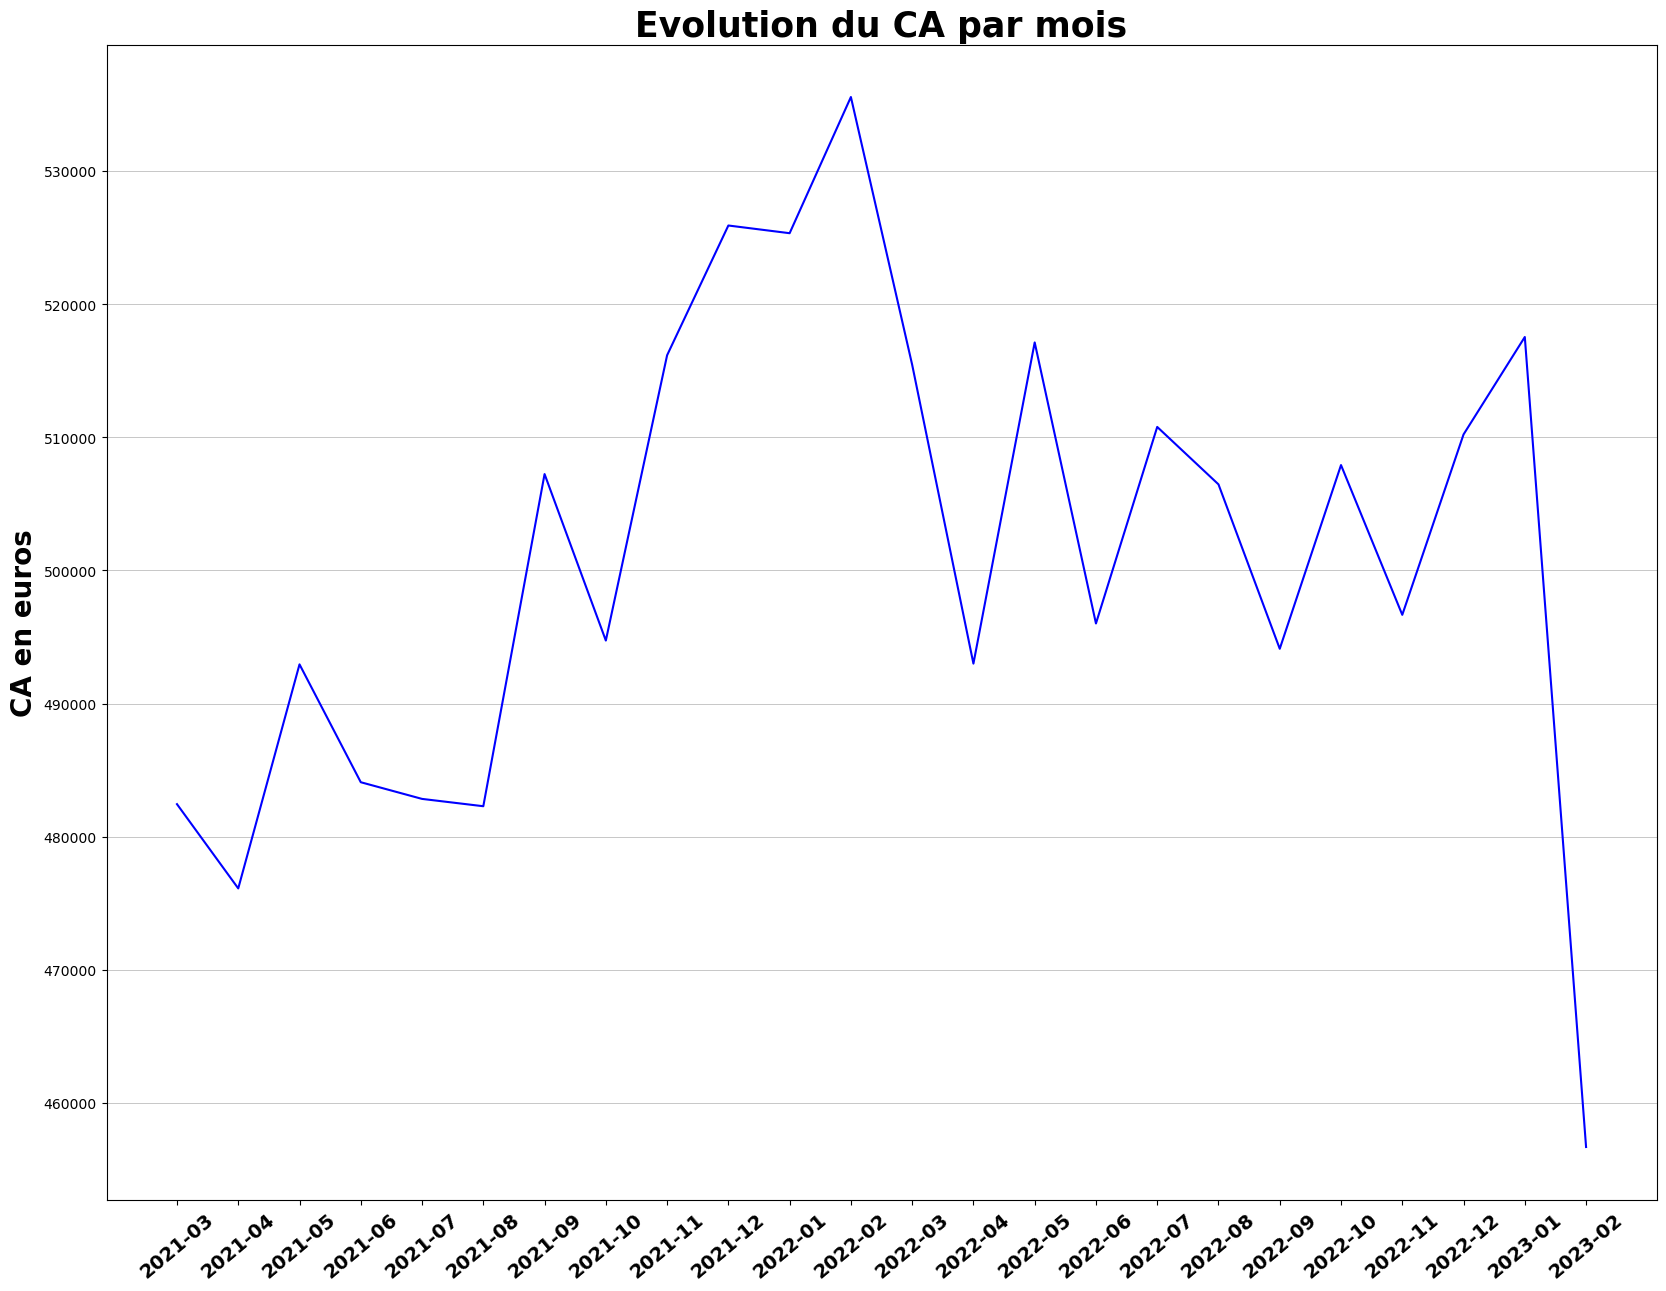

In [30]:
# Calcul du chiffre d’affaires mensuel
ca_mensuel = calcul_ca(data_maj,[data_maj['date_mois']])
ca_mensuel.sort_values(by='price')
ca_mensuel = ca_mensuel[['date_mois','price']]
print('Le CA mensuel moyen est de', round(ca_mensuel.mean(),2), '€.')

# Figure : Représentation du CA mensuel depuis le lancement
plt.figure(figsize=(20, 15))
plt.title('Evolution du CA par mois', fontsize=25, fontweight='bold')
plt.ylabel('CA en euros', fontsize=20, fontweight='bold')
plt.xticks(rotation = 40, fontweight = 'bold', fontsize = 14)
plt.grid(axis='y',linewidth = 0.5)

plt.plot(ca_mensuel['date_mois'], ca_mensuel['price'], color = 'blue')
plt.savefig('evo_ca_mensuel.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2179605359.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return pd.DataFrame(dt.groupby(variable).sum().reset_index())


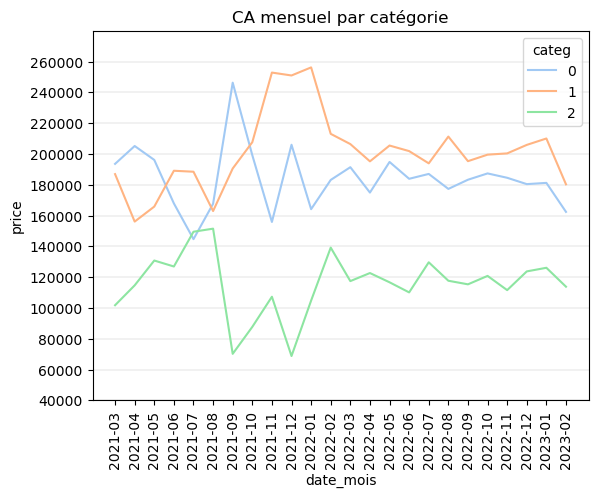

In [31]:
# CA mensuel par catégorie
ca_mensuel_categ = calcul_ca(data_maj,[data_maj['date_mois'], data_maj['categ']])
ca_mensuel_categ= ca_mensuel_categ[['date_mois','categ','price']]

sns.lineplot(data=ca_mensuel_categ, x='date_mois', y='price', hue='categ',
    palette = "pastel", legend='auto'
).set(title = 'CA mensuel par catégorie')
plt.ylim(40_000, 280_000)
plt.xticks(rotation = 90),
plt.yticks(np.arange(40_000, 280_000, step=20_000)),
plt.grid(axis = 'y', linewidth = 0.25)
plt.savefig('repart_ca_mois_categ.png', dpi=300, bbox_inches='tight')
plt.show()

<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 16px; color: RGB(34, 139, 34); "> CA par jour </h3>
</div>

In [32]:
# Calcul du chiffre d’affaires journalier
ca_journalier = calcul_ca(data_maj, [data_maj['date']])
ca_journalier.sort_values(by='price')
ca_journalier = ca_journalier[['date','price']]
print('Le CA journalier moyen est de', round(ca_journalier.mean(),2), '€.')
ca_journalier.head()

Le CA journalier moyen est de price    16476.25
dtype: float64 €.


C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2179605359.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return pd.DataFrame(dt.groupby(variable).sum().reset_index())
C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\1438121681.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print('Le CA journalier moyen est de', round(ca_journalier.mean(),2), '€.')


,date,price
0,2021-03-01,16565.22
1,2021-03-02,15486.45
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37


C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2179605359.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return pd.DataFrame(dt.groupby(variable).sum().reset_index())


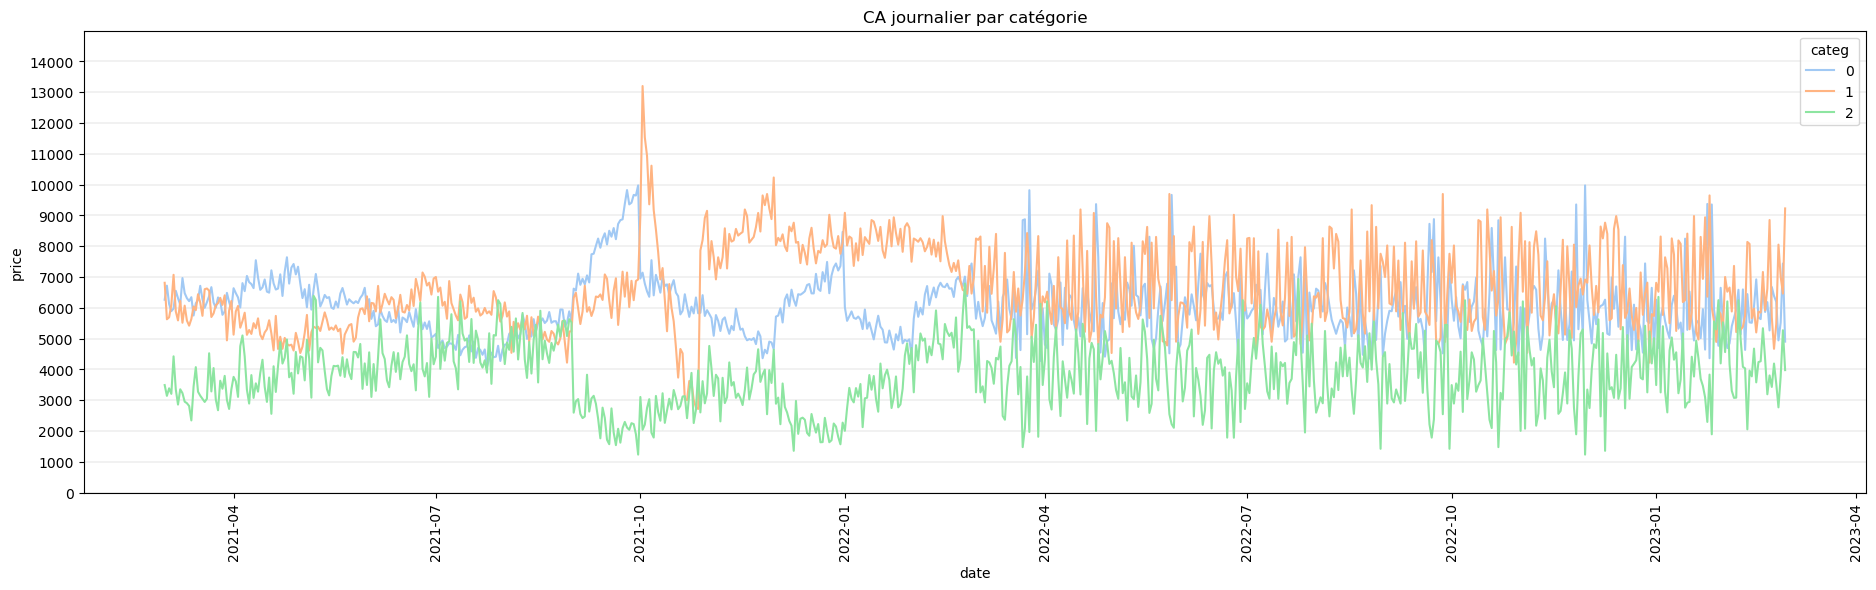

In [33]:
# CA journalier par catégorie
ca_jour_categ = calcul_ca(data_maj,[data_maj['date'], data_maj['categ']])
ca_jour_categ = ca_jour_categ[['date','categ','price']]

plt.figure(figsize=(23, 6))
sns.lineplot(data=ca_jour_categ, x='date', y='price', hue='categ',
    palette = "pastel", legend='auto'
).set(title = 'CA journalier par catégorie')
plt.ylim(0, 15_000)
plt.xticks(rotation = 90),
plt.yticks(np.arange(0, 15_000, step=1_000)),
plt.grid(axis = 'y', linewidth = 0.25)
plt.savefig('repart_ca_jour_categ.png', dpi=300, bbox_inches='tight')
plt.show()

<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 16px; color: RGB(34, 139, 34); "> CA par nom de jour</h3>
</div>

C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2179605359.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return pd.DataFrame(dt.groupby(variable).sum().reset_index())


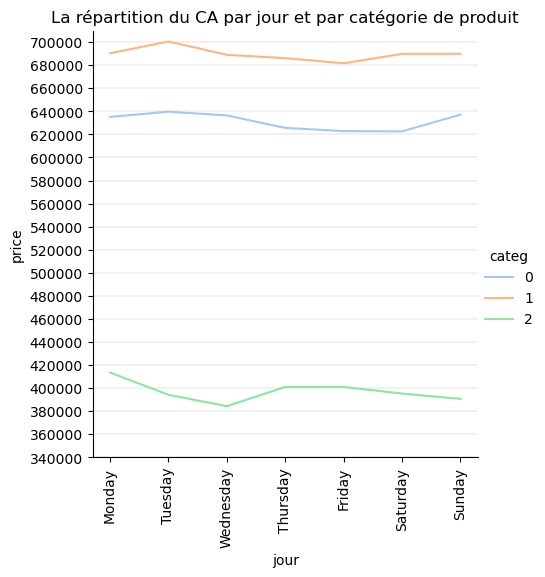

In [34]:
# CA journalier par catégorie
ca_jour_categ = calcul_ca(data_maj,[data_maj['jour'], data_maj['categ']])
ca_jour_categ = ca_jour_categ[['jour','categ','price']]
ca_jour_categ.jour = pd.Categorical(ca_jour_categ.jour,
                            categories=['Monday', 'Tuesday', 'Wednesday',
                                        'Thursday', 'Friday', 'Saturday', 'Sunday'],
                            ordered=True)
ca_jour_categ = ca_jour_categ.sort_values('jour')


sns.relplot(kind='line', data=ca_jour_categ, x='jour', y='price', hue='categ',
    palette = "pastel", 
    sort=True, legend='auto'
).set(title = 'La répartition du CA par jour et par catégorie de produit')
plt.ylim(340_000, 710_000)
plt.xticks(rotation = 90),
plt.yticks(np.arange(340_000, 710_000, step=20_000)),
plt.grid(axis = 'y', linewidth = 0.25)
plt.savefig('repart_ca_categ_nom_jour.png', dpi=300, bbox_inches='tight')
plt.show()

Le ca par catégorie est plutot stable même si on constate de legères fluctuation pour chaques catégories.

In [35]:
aggregated_data = data_maj.groupby(['jour', 'categ', 'annee_achat']).agg(
    total_price = ('price', 'sum'),
    moy_price   = ('price', 'mean'), 
    nbre_produits = ('id_prod', 'count'), 
    nbre_clients  = ('client_id', 'nunique')
).reset_index()

aggregated_data.head(10)

,jour,categ,annee_achat,total_price,moy_price,nbre_produits,nbre_clients
0,Friday,0,2021,271587.15,10.634212,25539,4957
1,Friday,0,2022,308565.11,10.665184,28932,5079
2,Friday,0,2023,42725.56,10.630893,4019,1725
3,Friday,1,2021,284313.69,20.544381,13839,5085
4,Friday,1,2022,349641.95,20.451682,17096,5363
5,Friday,1,2023,47734.06,20.390457,2341,1487
6,Friday,2,2021,163144.35,76.200070,2141,1220
7,Friday,2,2022,204220.91,75.386087,2709,1297
8,Friday,2,2023,33697.36,75.554619,446,296
9,Monday,0,2021,269811.64,10.664492,25300,5013


<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 16px; color: RGB(34, 139, 34); "> Calcul CA par clients</h3>
</div>

In [36]:
# Calcul du chiffre d’affaires par client
ca_client = calcul_ca(data_maj,[data_maj['client_id']])
ca_client = ca_client[['client_id', 'price']]
ca_client['ca_pourcent'] = round(100 * (ca_client['price'] / ca_client['price'].sum()),2) 
ca_client.rename(columns={'price':'total_sales'}, inplace = True)
ca_client.sort_values(by = 'total_sales', ascending = False).reset_index().head(10)

C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2179605359.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return pd.DataFrame(dt.groupby(variable).sum().reset_index())


,index,client_id,total_sales,ca_pourcent
0,677,c_1609,326039.89,2.71
1,4388,c_4958,290227.03,2.41
2,6337,c_6714,153918.60,1.28
3,2724,c_3454,114110.57,0.95
4,634,c_1570,5285.82,0.04
5,2513,c_3263,5276.87,0.04
6,1268,c_2140,5260.18,0.04
7,2108,c_2899,5214.05,0.04
8,7006,c_7319,5155.77,0.04
9,7715,c_7959,5135.75,0.04


Quatres clients (c_1609, c_4958 ,c_6714 et c_3454) représentent plus de 1% du CA; alors que les autres représentent 0.04% ou moins du CA. Nous appelerons ces quatres clients des "top clients" et nous les écarterons du jeu de données afin de ne pas fausser l'analyse.

In [37]:
# Ajout distribution du CA par client en pourcentage dans le df
data_maj = pd.merge(data_maj, ca_client, on = 'client_id').reset_index()

data_maj = data_maj[['id_prod','price','categ','client_id','sex','birth',
                     'age','age_achat','date','date_mois','jour','mois',
                     'annee_achat','session_id','total_sales',
                     'ca_pourcent']]

data_maj.rename(columns={'total_sales': 'total_sales_client'}, inplace = True)

In [38]:
# Isoler les 4 gros clients qui représentent plus de 1% du CA
top_clients = data_maj.loc[(data_maj.ca_pourcent >= 0.95)]

# Supprimer les 4 gros clients du df
data_maj = data_maj.loc[(data_maj.ca_pourcent < 0.95)]

<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 16px; color: RGB(34, 139, 34); "> CA par tranche d'âge </h3>
</div>

In [39]:
aggregated_data_client = data_maj.groupby(['age', 'categ', 'annee_achat', 'sex']).agg(
    total_price = ('price', 'sum'),
    moy_price   = ('price', 'mean'), 
    nbre_produits = ('id_prod', 'count'), 
    nbre_clients  = ('client_id', 'nunique')
).reset_index()

# Discrétisation par tranches d'âge de 10 ans
aggregated_data_client['classe_age'] = '17-29'
aggregated_data_client['classe_age'].loc[aggregated_data_client[aggregated_data_client['age']>=30].index] = '30-39'
aggregated_data_client['classe_age'].loc[aggregated_data_client[aggregated_data_client['age']>=40].index] = '40-49'
aggregated_data_client['classe_age'].loc[aggregated_data_client[aggregated_data_client['age']>=50].index] = '50-59'
aggregated_data_client['classe_age'].loc[aggregated_data_client[aggregated_data_client['age']>=60].index] = '60-69'
aggregated_data_client['classe_age'].loc[aggregated_data_client[aggregated_data_client['age']>=70].index] = '70-79'
aggregated_data_client['classe_age'].loc[aggregated_data_client[aggregated_data_client['age']>=80].index] = '80 et +'

aggregated_data_client

C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\1289529733.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_data_client['classe_age'].loc[aggregated_data_client[aggregated_data_client['age']>=30].index] = '30-39'
C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\1289529733.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_data_client['classe_age'].loc[aggregated_data_client[aggregated_data_client['age']>=40].index] = '40-49'
C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\1289529733.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

,age,categ,annee_achat,sex,total_price,moy_price,nbre_produits,nbre_clients,classe_age
0,19,0,2021,f,8163.49,10.547145,774,153,17-29
1,19,0,2021,m,6565.94,10.488722,626,139,17-29
2,19,0,2022,f,10045.47,10.431433,963,141,17-29
3,19,0,2022,m,7872.21,10.609447,742,111,17-29
4,19,0,2023,f,1671.74,10.319383,162,63,17-29
...,...,...,...,...,...,...,...,...,...
1301,94,1,2022,f,430.46,22.655789,19,1,80 et +
1302,94,1,2022,m,1081.61,18.648448,58,2,80 et +
1303,94,1,2023,f,82.84,20.710000,4,1,80 et +
1304,94,1,2023,m,124.29,17.755714,7,2,80 et +


C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2179605359.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return pd.DataFrame(dt.groupby(variable).sum().reset_index())


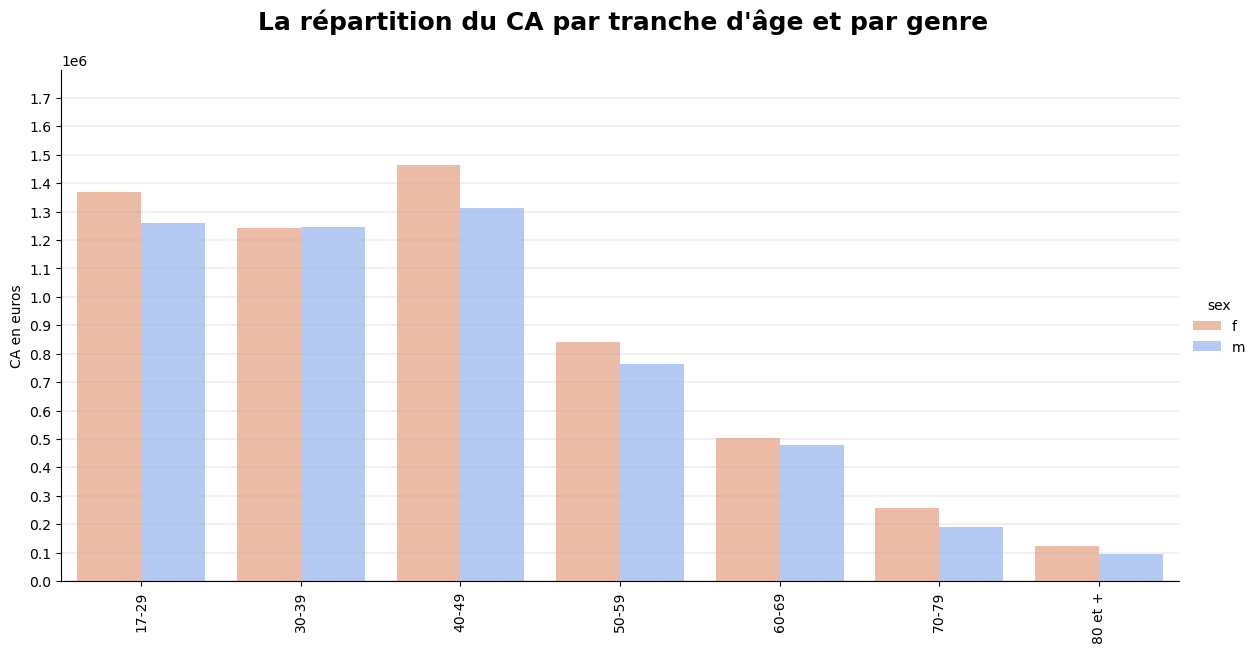

In [40]:
ca_tranche_age_sex = calcul_ca(aggregated_data_client, [aggregated_data_client['classe_age'],aggregated_data_client['sex']])

# Figure : Répartition du CA par tranche d'âge et par genre
g = sns.catplot(
    data = ca_tranche_age_sex, 
    kind = "bar",
    x = 'classe_age', 
    y = 'total_price', 
    hue = 'sex', 
    palette = "coolwarm_r", 
    height = 6, 
    aspect = 20/10, 
    legend_out = True
)
g.set_axis_labels("", "CA en euros")
g.fig.suptitle(
    'La répartition du CA par tranche d\'âge et par genre', 
    fontsize = 18,
    fontweight = 'bold',
    y = 1.05
  )
plt.ylim(0, 1_800_000)
plt.xticks(rotation = 90),
plt.yticks(np.arange(0, 1_800_000, step=100_000)),
plt.grid(axis = 'y', linewidth = 0.25)
plt.savefig('repart_age_genre.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2179605359.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return pd.DataFrame(dt.groupby(variable).sum().reset_index())


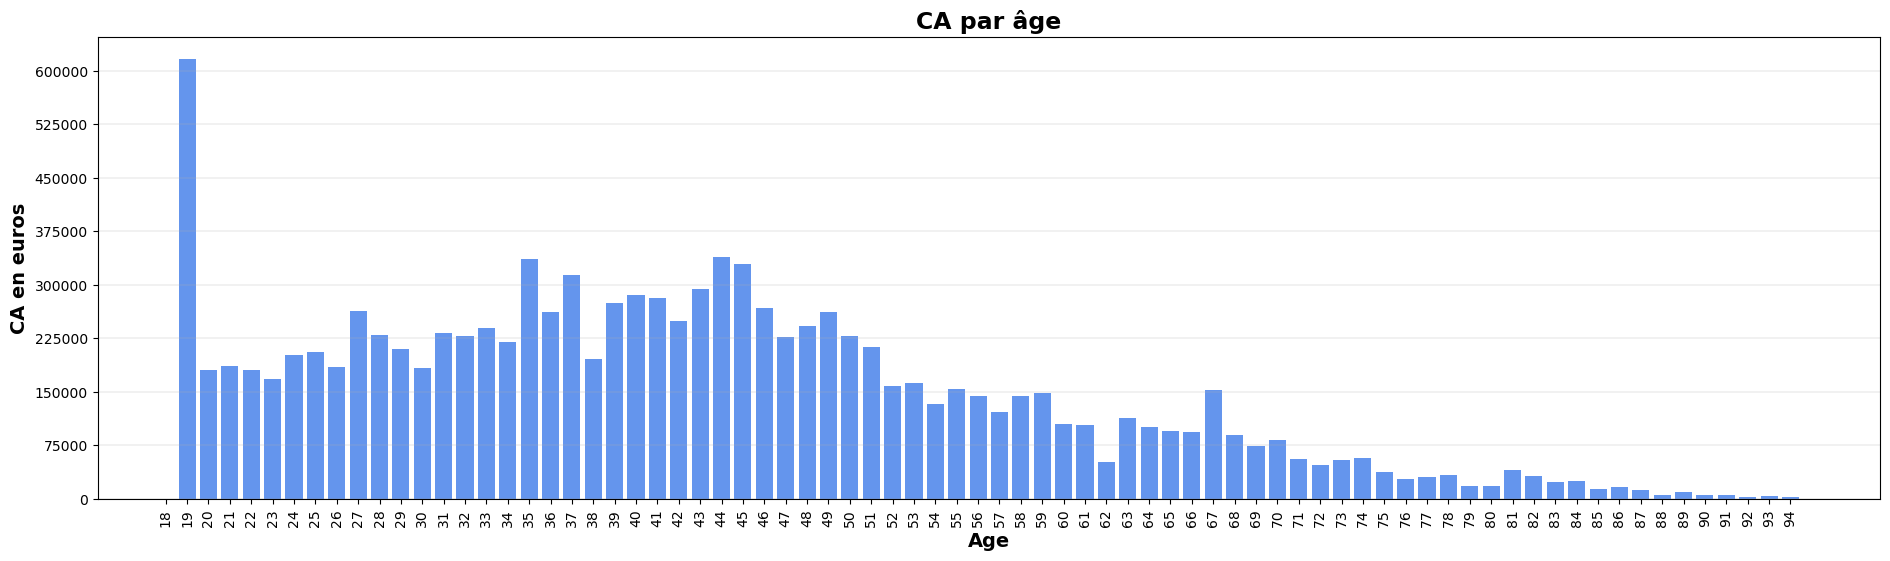

In [41]:
ca_age_sex = calcul_ca(aggregated_data_client, [aggregated_data_client['age']])

data_fig = ca_age_sex.total_price
labels = ca_age_sex.age

plt.figure(figsize=(23, 6))

line1 = plt.bar(labels, data_fig, color = 'cornflowerblue')

plt.title('CA par âge', fontsize=17, fontweight='bold')
plt.xlabel('Age', fontsize=14, fontweight='bold')
plt.ylabel('CA en euros', fontsize=14, fontweight='bold')
plt.xticks(np.arange(18, 95, step=1), rotation = 90)
plt.yticks(np.arange(0, 620_000, step=75_000))
plt.grid(axis = 'y', linewidth = 0.25)
plt.savefig('repart_age.png', dpi=300, bbox_inches='tight')
plt.show()

Il est étonnant de constater que les personnes de 19 ans sont ceux qui ont le plus acheté sur le eshop. Etant donné que l'âge calculé prends l'année à l'instant T, on peut penser que ces personnes étaient plus jeunes au moment de l'achat, 17 ans au plus.

In [42]:
aggregated_data_client = data_maj.groupby(['client_id','age','age_achat','sex']).agg(
    total_price = ('price', 'sum'),
    moy_price   = ('price', 'mean'), 
    nbre_produits = ('id_prod', 'count'), 
    nbre_clients  = ('client_id', 'nunique')
).reset_index()

In [43]:
client_19 = aggregated_data_client.loc[aggregated_data_client.age == 19]
client_19

,client_id,age,age_achat,sex,total_price,moy_price,nbre_produits,nbre_clients
139,c_1042,19,17,f,59.74,29.870000,2,1
140,c_1042,19,18,f,242.57,34.652857,7,1
141,c_1042,19,19,f,46.44,15.480000,3,1
150,c_1046,19,17,m,454.94,28.433750,16,1
151,c_1046,19,18,m,374.14,18.707000,20,1
...,...,...,...,...,...,...,...,...
24090,c_972,19,17,m,494.88,54.986667,9,1
24091,c_972,19,18,m,604.60,54.963636,11,1
24131,c_985,19,17,f,681.35,42.584375,16,1
24132,c_985,19,18,f,735.37,21.010571,35,1


In [44]:
client_19.client_id.drop_duplicates()

139      c_1042
150      c_1046
208      c_1065
278      c_1088
283       c_109
          ...  
24040     c_956
24059     c_962
24081      c_97
24090     c_972
24131     c_985
Name: client_id, Length: 437, dtype: object

437 clients ont "19 ans". Il s'agit peut être d'une erreur au niveau de la variable âge (mal ou non renseigné par le client). On ne cherchera pas à corriger les âges.

<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 16px; color: RGB(34, 139, 34); "> CA par genre </h3>
</div>

C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2179605359.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return pd.DataFrame(dt.groupby(variable).sum().reset_index())


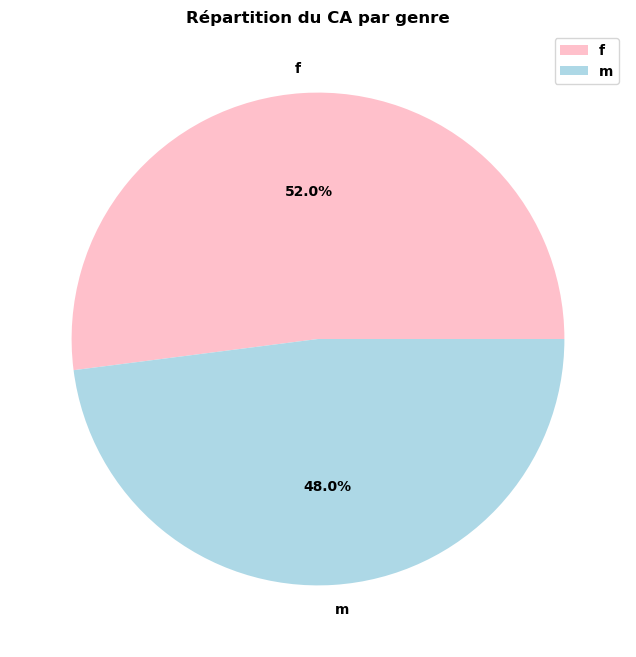

In [45]:
ca_genre = calcul_ca(aggregated_data_client, [aggregated_data_client['sex']])

data_fig = ca_genre.total_price

colors = 'pink','lightblue'
title = 'Répartition du CA par genre'
plt.rcParams['figure.figsize'] = [17,8]
plt.rcParams['text.color'] = 'black'
plt.rcParams['font.weight'] ='bold'
plt.title(title, fontweight ='bold', loc = 'center', color = "black")

fig = plt.pie(data_fig, colors = colors, labels = ca_genre.sex, autopct = '%.1F%%')
plt.legend(bbox_to_anchor = [1, 1], labelcolor = "black", facecolor = "white")

plt.savefig('repart_ca_genre.png', dpi=300, bbox_inches='tight')
plt.show()

Il y a autant d'hommes que de femmes qui ont achetés des livres, depuis l'ouverture du site

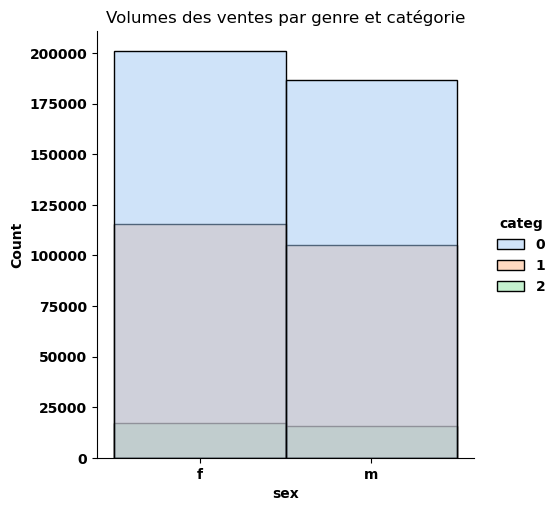

In [46]:
sns.displot(data=data_maj, x='sex', hue='categ', palette = 'pastel')
plt.title('Volumes des ventes par genre et catégorie')
plt.savefig('nb_ventes_genre_categ.png', dpi=300, bbox_inches='tight')
plt.show()

Les hommes et les femmes achètent dans toutes les catégories de façon presque similaire. Le fait que les hommes achètent moins que les femmes s'explique sans doute par le fait que les hommes sont moins nombreux dans notre panel de clients.

In [47]:
client_genre = data_maj[['client_id', 'sex']].drop_duplicates()

In [48]:
client_genre.sex.value_counts()

f    4478
m    4118
Name: sex, dtype: int64

<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 16px; color: RGB(34, 139, 34); "> Décomposition en moyenne mobile </h3>
</div>

*DEFINITION DE L'INSEE*

Une moyenne mobile permet de lisser une série de valeurs exprimées en fonction du temps (série chronologique). Elle permet d'éliminer les fluctuations les moins significatives. On calcule des moyennes mobiles d'ordre 3, 4, 5, etc. L'ordre est le nombre de périodes (années, trimestres, mois, etc.) sur lesquelles la moyenne mobile est calculée.

In [49]:
ca_journalier = data_maj.groupby(['date']).agg({'price':'sum'}).reset_index()

# Définir 'jour' comme index pour permettre une manipulation temporelle
ca_journalier.set_index('date', inplace=True)

In [50]:
# Décomposition en moyenne mobile
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_jour = seasonal_decompose(ca_journalier['price'], model='additive', period=7)

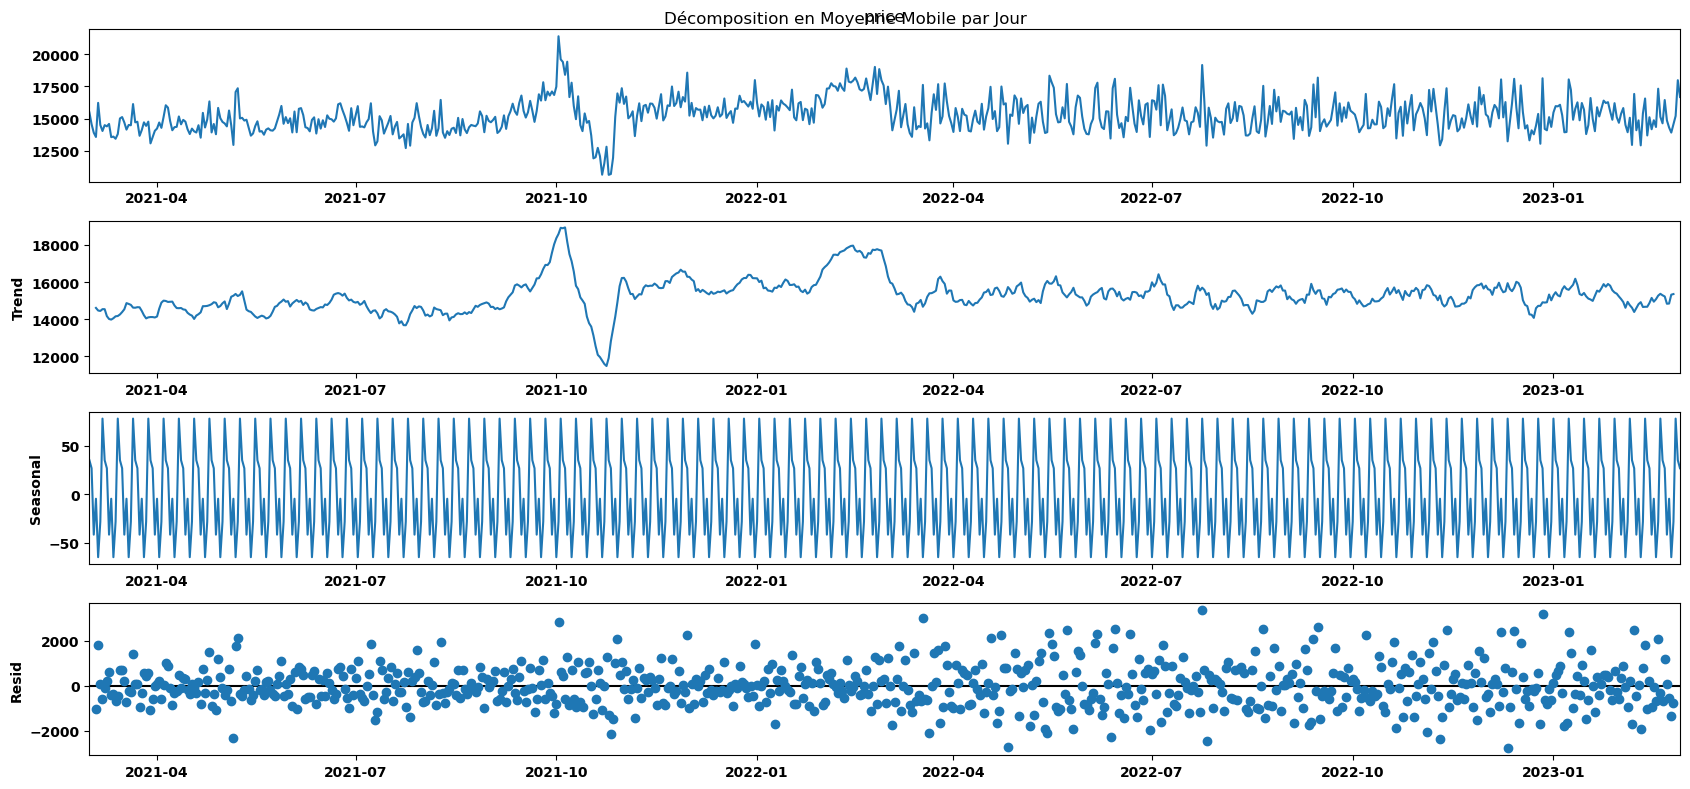

In [51]:
# Tracer la décomposition quotidienne
decomp_jour.plot()
plt.suptitle('Décomposition en Moyenne Mobile par Jour')
plt.savefig('decompo_mm.png', dpi=300, bbox_inches='tight')

### Tracer la moyenne mobile par rapport aux données brutes

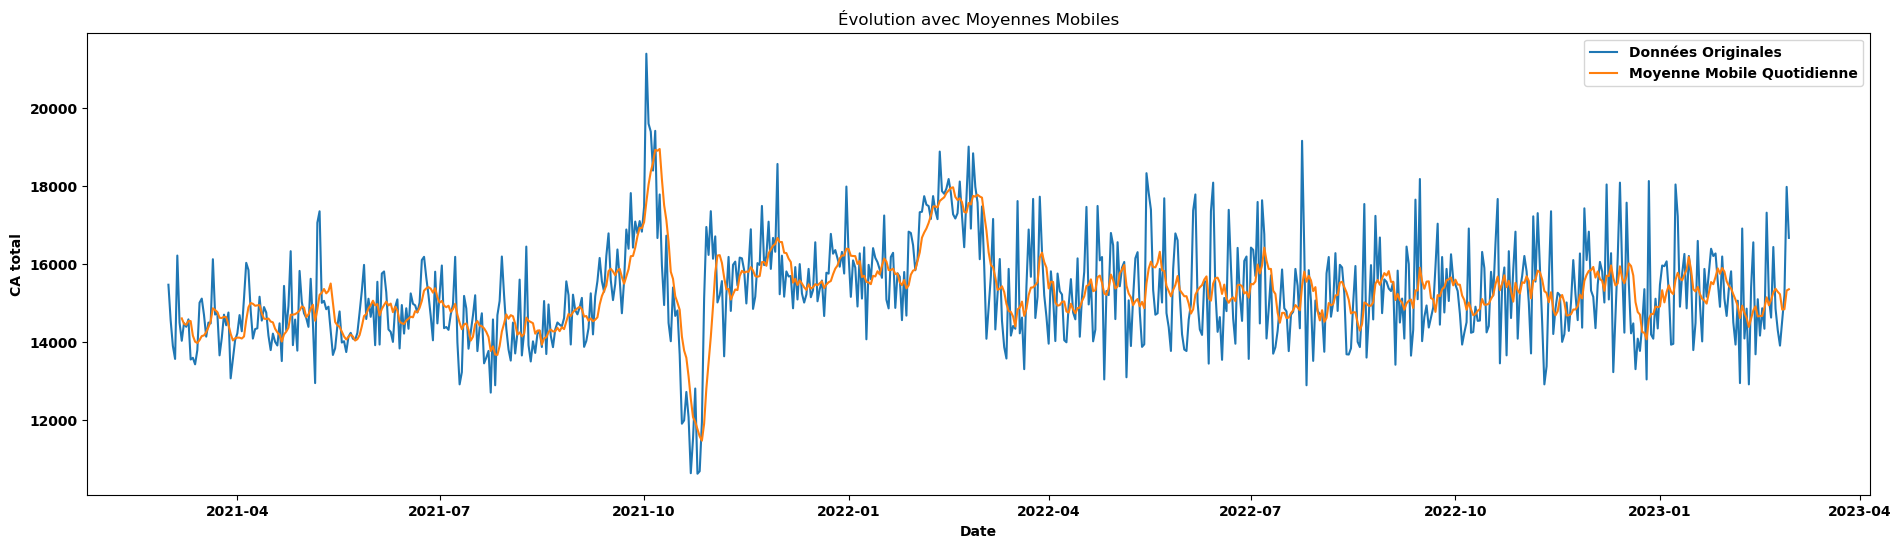

In [52]:
# Calculer la moyenne mobile quotidienne sur une fenêtre de 7 jours
ca_journalier['moyenne_mobile_quotidienne'] = ca_journalier['price'].rolling(window=7).mean()

# Tracer les données originales et les moyennes mobiles
plt.figure(figsize=(23, 6))
plt.plot(ca_journalier['price'], label='Données Originales')
plt.plot(ca_journalier['moyenne_mobile_quotidienne'], label='Moyenne Mobile Quotidienne')

plt.title('Évolution avec Moyennes Mobiles')
plt.xlabel('Date')
plt.ylabel('CA total')
plt.legend()
plt.savefig('evo_CA_mm.png', dpi=300, bbox_inches='tight')
plt.show()

<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 16px; color: RGB(34, 139, 34); "> Courbes de Lorenz et Pareto </h3>
</div>

*DEFINITION*

La courbe de Lorenz, du nom de son inventeur, est une représentation graphique permettant de visualiser la distribution d’une variable (actif, patrimoine, revenu, etc.) au sein d’une population. Plus précisément, elle permet de représenter la fonction de répartition qui associe à chaque fractile de population la part de richesse détenue par celui-ci. Autrement dit, elle représente combien la part X d’une population détient de part Y d’une variable.
Source: https://www.bsi-economics.org/287-%E2%98%86-la-courbe-de-lorenz

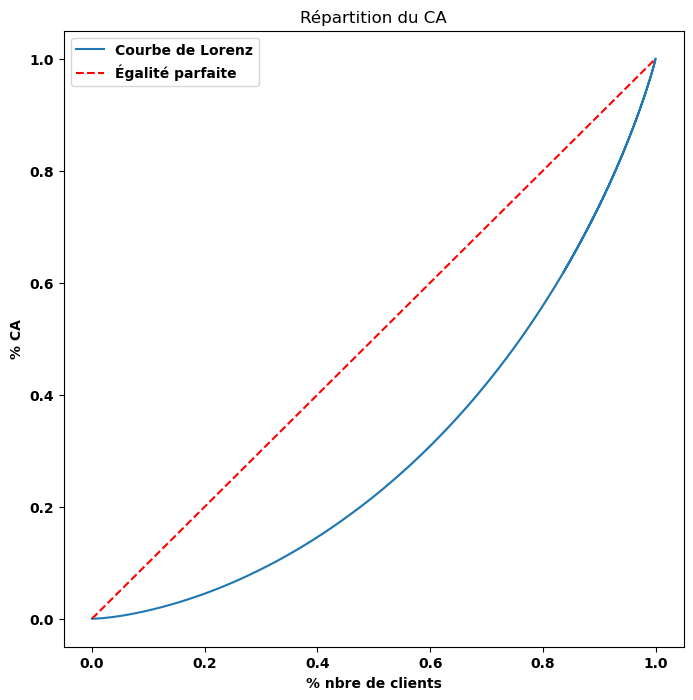

In [53]:
# Courbe de Lorenz pour montrer la répartition du CA entre tous les clients
prix_client = data_maj.groupby(['client_id']).agg({"price":"sum"})
prix = prix_client['price'].values
n = len(prix)
lorenz = np.cumsum(np.sort(prix)) / prix.sum()
lorenz = np.append([0],lorenz) 

xaxis = np.linspace(0,1,len(lorenz)) 
plt.figure(figsize=(8, 8))
plt.plot(xaxis,lorenz,drawstyle='steps-post',  label='Courbe de Lorenz')
plt.plot([0,1], [0,1], linestyle='--', color='red', label='Égalité parfaite')
plt.title('Répartition du CA')
plt.xlabel('% nbre de clients')
plt.ylabel('% CA')
plt.legend()
plt.savefig('lorenz_clients.png', dpi=300, bbox_inches='tight')
plt.show()

On note que 80% des clients détiennent près de 50% du CA 

In [54]:
# Calculer l'indice de Gini pour determiner si la répartition du CA est égale entre tous les clients.
AUC = (lorenz.sum()-lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC
gini = 2*S
gini

0.39828603507456617

L'indice de Gini mesure ici l'inégalité des chiffres d'affaires de tous les clients.

Indice de Gini : chiffre de 0 à 1 mesurant l'aire entre la bissectrice et la courbe de Lorenz.

Un coefficient de 0 indiquerait une égalité parfaite.
Un coefficiant de 1 indiquerait une forte inégalité; un seul client détiendrait la totalité du chiffre d'affaires.

### Pareto en utilisant la courbe de Lorenz

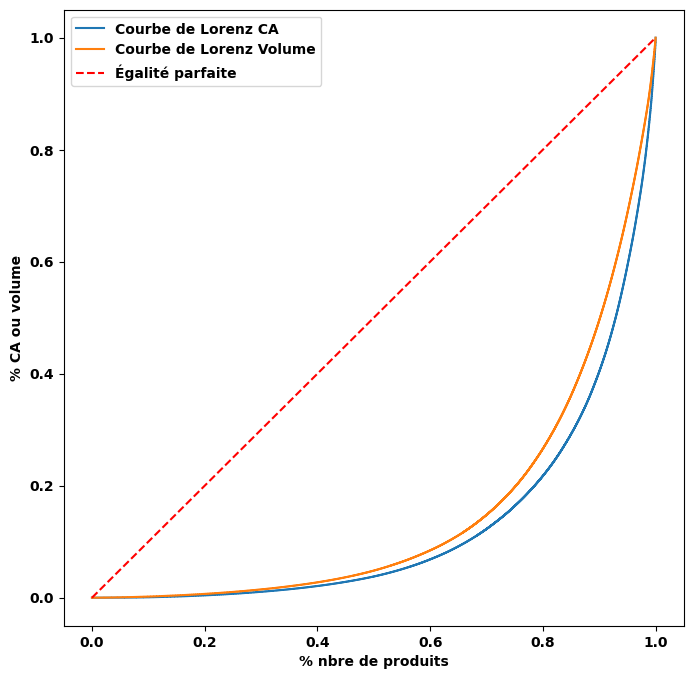

In [55]:
# Courbes de Lorenz pour montrer la répartition du CA et du volume par produits
prix_produit = data_maj.groupby(['id_prod']).agg({"price":"sum"})

data_maj['quantite']=1

aggregated_data = data_maj.groupby(['id_prod']).agg(
    total_price = ('price', 'sum'),
    moy_price   = ('price', 'mean'), 
    nbre_produits = ('id_prod', 'nunique'), 
    nbre_ventes = ('quantite', 'sum'),
    nbre_clients  = ('client_id', 'nunique') 
).reset_index()

ca = aggregated_data['total_price'].values
n = len(ca)
lorenz_ca = np.cumsum(np.sort(ca)) / ca.sum()
lorenz_ca = np.append([0],lorenz_ca) 

volume = aggregated_data['nbre_ventes'].values
n = len(volume)
lorenz = np.cumsum(np.sort(volume)) / volume.sum()
lorenz = np.append([0],lorenz) 

xaxis = np.linspace(0,1,len(lorenz)) 
plt.figure(figsize=(8, 8))
plt.plot(xaxis,lorenz_ca,drawstyle='steps-post',  label='Courbe de Lorenz CA')
plt.plot(xaxis,lorenz,drawstyle='steps-post',  label='Courbe de Lorenz Volume')
plt.plot([0,1], [0,1], linestyle='--', color='red', label='Égalité parfaite')
plt.xlabel('% nbre de produits')
plt.ylabel('% CA ou volume')
plt.legend()
plt.savefig('lorenz_volume.png', dpi=300, bbox_inches='tight')
plt.show()

80% des produits font environ 20% du CA ou du volume vendu. Cela démontre une certaine corrélation entre volume et valeur.

<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 16px; color: RGB(34, 139, 34); "> Top et Flop produits </h3>
</div>

In [56]:
# Top 10 par CA produit
aggregated_data = data_maj.groupby(['id_prod']).agg(
    total_price = ('price', 'sum'),
    moy_price   = ('price', 'mean'),
    nbre_ventes = ('quantite', 'sum'),
    nbre_clients  = ('client_id', 'nunique') 
).reset_index().sort_values('total_price', ascending = False)
top10_ca = aggregated_data.iloc[:10]
top10_ca

,id_prod,total_price,moy_price,nbre_ventes,nbre_clients
3093,2_159,91097.76,145.99,624,526
3067,2_135,63470.80,68.99,920,400
3043,2_112,58785.90,67.57,870,380
3032,2_102,55650.74,59.14,941,400
2589,1_369,52897.95,23.99,2205,994
2617,1_395,52182.00,28.99,1800,829
3149,2_209,50742.75,69.99,725,314
2639,1_414,50376.62,23.83,2114,941
2605,1_383,49746.84,28.99,1716,808
3101,2_166,48308.40,230.04,210,97


In [57]:
# Top 10 par volume des ventes produit
aggregated_data = data_maj.groupby(['id_prod']).agg(
    total_price = ('price', 'sum'),
    moy_price   = ('price', 'mean'),
    nbre_ventes = ('quantite', 'sum'),
    nbre_clients  = ('client_id', 'nunique') 
).reset_index().sort_values('nbre_ventes', ascending = False)
top10_vol = aggregated_data.iloc[:10]
top10_vol

,id_prod,total_price,moy_price,nbre_ventes,nbre_clients
2589,1_369,52897.95,23.99,2205,994
2642,1_417,44561.77,20.99,2123,983
2639,1_414,50376.62,23.83,2114,941
2731,1_498,47721.54,23.37,2042,950
2651,1_425,34421.74,16.99,2026,923
2638,1_413,34810.65,17.99,1935,915
2637,1_412,31884.75,16.65,1915,877
2631,1_407,30109.17,15.99,1883,872
2618,1_396,34875.00,18.60,1875,877
2627,1_403,33713.26,17.99,1874,854


In [58]:
# Flop 10 par CA produit
aggregated_data = data_maj.groupby(['id_prod']).agg(
    total_price = ('price', 'sum'),
    moy_price   = ('price', 'mean'),  
    nbre_ventes = ('quantite', 'sum'),
    nbre_clients  = ('client_id', 'nunique') 
).reset_index().sort_values('total_price')
flop10_ca = aggregated_data.iloc[:10]
flop10_ca

,id_prod,total_price,moy_price,nbre_ventes,nbre_clients
594,0_1539,0.99,0.99,1,1
209,0_1191,0.99,0.99,1,1
312,0_1284,1.38,1.38,1,1
799,0_1726,1.57,1.57,1,1
718,0_1653,1.98,0.99,2,1
2077,0_807,1.99,1.99,1,1
1783,0_541,1.99,1.99,1,1
664,0_1601,1.99,1.99,1,1
958,0_1871,1.99,1.99,1,1
801,0_1728,2.27,2.27,1,1


<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 16px; color: RGB(34, 139, 34); "> Volume des ventes par catégorie et par jour</h3>
</div>

In [59]:
aggregated_data = data_maj.groupby(['jour','categ']).agg(
    total_price = ('price', 'sum'),
    moy_price   = ('price', 'mean'), 
    nbre_produits = ('id_prod', 'nunique'), 
    nbre_ventes = ('quantite', 'sum'),
    nbre_clients  = ('client_id', 'nunique') 
).reset_index().sort_values('categ')
aggregated_data

,jour,categ,total_price,moy_price,nbre_produits,nbre_ventes,nbre_clients
0,Friday,0,580937.99,10.661565,2044,54489,6220
18,Wednesday,0,594179.80,10.638470,2069,55852,6336
3,Monday,0,592582.45,10.625851,2057,55768,6316
15,Tuesday,0,596636.04,10.647750,2054,56034,6331
6,Saturday,0,579048.80,10.606649,2038,54593,6275
12,Thursday,0,580967.34,10.629525,2064,54656,6355
9,Sunday,0,594848.27,10.643387,2039,55889,6348
16,Tuesday,1,655685.98,20.511339,704,31967,7005
13,Thursday,1,644010.20,20.483133,710,31441,6992
19,Wednesday,1,643230.25,20.493524,700,31387,6938


<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 16px; color: RGB(34, 139, 34); "> Profil client </h3>
</div>

In [60]:
# Calcul panier moyen
aggregated_data_customer = data_maj.groupby(['client_id','age']).agg(
    total_price = ('price', 'sum'),
    moy_price   = ('price', 'mean'), 
    nbre_produits = ('id_prod', 'nunique'), 
    nbre_ventes = ('quantite', 'sum'),
    nbre_clients  = ('client_id', 'nunique'),
    nbre_visites = ('session_id', 'nunique')
).reset_index()

aggregated_data_customer['panier_moyen'] = aggregated_data_customer['total_price'] / aggregated_data_customer['nbre_ventes']

In [61]:
# Calcul de la fréquence mensuelle d'achat 
aggregated_data_customer['frequence_achat'] = round(aggregated_data_customer.nbre_ventes/24,0)

In [62]:
# Nombre de visites moyen
aggregated_data_customer.nbre_visites.mean()

37.5134946486738

In [63]:
aggregated_data_customer.head()

,client_id,age,total_price,moy_price,nbre_produits,nbre_ventes,nbre_clients,nbre_visites,panier_moyen,frequence_achat
0,c_1,68,629.02,14.628372,23,43,1,34,14.628372,2.0
1,c_10,67,1353.60,23.337931,27,58,1,34,23.337931,2.0
2,c_100,31,254.85,31.856250,6,8,1,5,31.856250,0.0
3,c_1000,57,2291.88,18.189524,53,126,1,94,18.189524,5.0
4,c_1001,41,1823.85,17.707282,57,103,1,47,17.707282,4.0


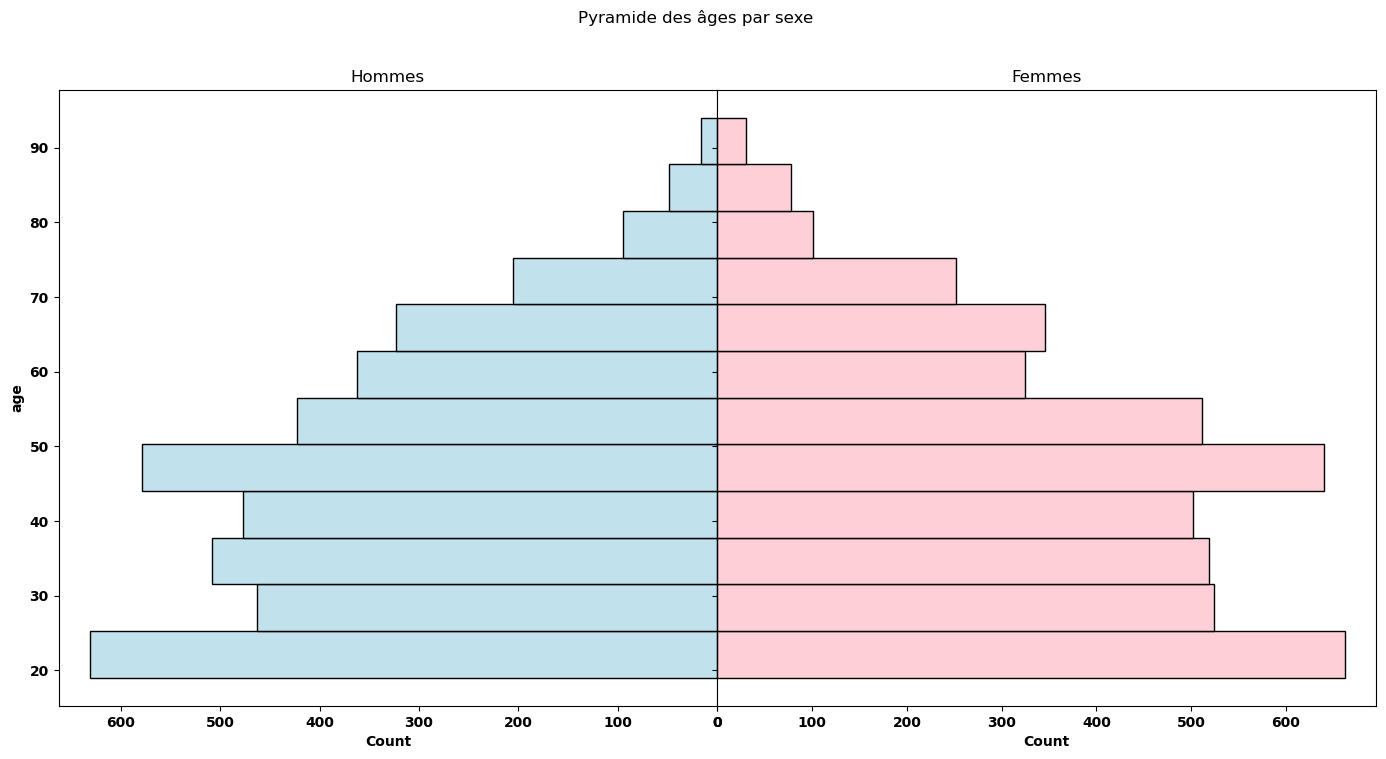

In [64]:
# Répartition des clients par âge et par sexe
customers['age'] = 2023 - customers.birth

fig, axes = plt.subplots(1, 2)
fig.suptitle('Pyramide des âges par sexe')

sns.histplot(ax=axes[0], y=customers[customers['sex']=='m']['age'], bins=12, 
             color = 'lightblue'
            )
axes[0].invert_xaxis()
axes[0].set_title('Hommes')

sns.histplot(ax=axes[1], y=customers[customers['sex']=='f']['age'], bins=12, 
             color = 'pink'
            )
axes[1].set_yticklabels([])
axes[1].set_ylabel('')
axes[1].set_title('Femmes')

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('pyramide_ages.png', dpi=300, bbox_inches='tight')
plt.show()

In [65]:
aggregated_data_customer.describe(include='all')

,client_id,age,total_price,moy_price,nbre_produits,nbre_ventes,nbre_clients,nbre_visites,panier_moyen,frequence_achat
count,8596,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.0,8596.000000,8596.000000,8596.000000
unique,8596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,c_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,44.739646,1296.343300,21.926199,36.046417,74.538623,1.0,37.513495,21.926199,3.100745
std,NaN,16.910542,958.404544,14.634385,31.618068,68.074309,0.0,30.898817,14.634385,2.860226
min,NaN,19.000000,6.310000,4.150000,1.000000,1.000000,1.0,1.000000,4.150000,0.000000
25%,NaN,31.000000,562.645000,13.472771,14.000000,28.000000,1.0,15.000000,13.472771,1.000000
50%,NaN,44.000000,1045.585000,15.928454,26.000000,52.000000,1.0,27.000000,15.928454,2.000000
75%,NaN,57.000000,1796.015000,21.961065,47.000000,97.000000,1.0,50.000000,21.961065,4.000000


<div style="background-color: RGB(51, 153, 102);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">III.II - Analyse des corrélations</h2>
</div>

<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 16px; color: RGB(34, 139, 34); "> Tests de normalité et tests statistiques </h3>
</div>

Afin de mener à bien les différentes corrélation à étudier, nous allons devoir utiliser différents tests qui seront listés ci-dessous et dont on définiera les fonctions en amont.

### Tester la normalité

In [66]:
# Test de Kolmogorov
from scipy.stats import kstest

def test_kolmogorov (df, field) :
        mu = df[field].mean()
        sigma = df[field].std()
        # Test de Kolmogorov
        result, pvalue = kstest(np.random.normal(mu,sigma,78),'norm')
        print('Test de Kolmogorov result = ', result)
        print('Test de Kolmogorov pvalue = ', pvalue)
        if pvalue > .05:
            return print('H0: la variable suit la loi normale.\n')
        else:
            return print('H1: la variable ne suit pas la loi normale.\n')

In [67]:
# Test de Shapiro
from scipy.stats import shapiro

def test_shapiro (df,column) :
    result, pvalue = shapiro(df[column])
    print('Test de Shapiro result = ', result)
    print('Test de Shapiro pvalue = ', pvalue)
    if pvalue > .05:
        return print('H0: la variable suit la loi normale.\n')
    else:
        return print('H1: la variable ne suit pas la loi normale.\n')

In [68]:
# Test de normalité des résidus 
def test_shapiro_resid (dt, field_num, field_categ) :
    model = ols('field_num ~ field_categ', data=dt).fit()
    result, pvalue = shapiro(model.resid)
    print('Shapiro résidus result :', result)
    print('Shapiro résidus pvalue :', pvalue)
    if pvalue > 0.05 : 
        return print('H0 : Les résidus suivent une loi normale. '
                     'La condition est validée.\n')
    else : 
        return print('H1 : Les résidus ne suivent pas une loi normale. '
                     'La condition n\'est pas validée.\n')

### Test d'égalité des variances

In [69]:
# Test de Bartlett
def test_bartlett(*args) :
    result, pvalue = stats.bartlett(*args)
    print('Test de Bartlett result :', result)
    print('Test de Bartlett pvalue :', pvalue)
    if pvalue > 0.05 : 
        return print('H0 : Les variances de chaque groupe sont égales. '
                     'La condition est validée.\n')
    else : 
        return print('H1 : Les variances de chaque groupe ne sont pas toutes égales. '
                     'La condition n\'est pas validée.\n')

In [70]:
# Test de Levene
def test_levene(*args) :
    result_median, pvalue_median = stats.levene(*args, center='median')
    result_mean, pvalue_mean = stats.levene(*args, center='mean')
    print('Test de Levene result median :', result_median, ' Test de Levene result mean :', result_mean)
    print('Test de Levene pvalue median :', pvalue_median, ' Test de Levene pvalue mean :', pvalue_mean)
    if pvalue_median > 0.05 : 
        return print('H0 : Les variances de chaque groupe sont égales.La condition est validée.\n')
    else : 
        return print('H1 : Les variances de chaque groupe ne sont pas toutes égales. '
                     'La condition n\'est pas validée.\n')
    if pvalue_mean > 0.05 : 
        return print('H0 : Les variances de chaque groupe sont égales. '
                     'La condition est validée.\n')
    else : 
        return print('H1 : Les variances de chaque groupe ne sont pas toutes égales. '
                     'La condition n\'est pas validée.\n')

In [71]:
# Test de Fligner_Killeen
def test_fligner(*args) :
    result, pvalue = stats.fligner(*args)
    print('Test de Fligner result :', result)
    print('Test de Fligner pvalue :', pvalue)
    if pvalue > 0.05 : 
        return print('H0 : Les variances de chaque groupe sont égales. La condition est validée.\n')
    else : 
        return print('H1 : Les variances de chaque groupe ne sont pas toutes égales. La condition n\'est pas validée.\n')

### Vérifier le lien entre variables

In [72]:
# Coefficiant de corrélation de Pearson
from scipy.stats import pearsonr

def test_pearson (df, var1, var2):
    correlation, p_value = pearsonr(df[var1],df[var2])
    print(f'Corrélation de Pearson : {correlation}')
    print(f'Pearson p-value : {p_value}')
    if p_value < 0.05:
        return print('H1 : Il existe une corrélation linéaire significative entre '
                     'les deux variables (H0 est rejetée).\n')
    else:
        return print('H0 : Il n\'y a pas de corrélation linéaire significative '
                     'entre les deux variables (H0 n\'est pas rejetée).\n')

In [73]:
# Test de Spearman
from scipy.stats import spearmanr

def test_spearman (df, var1, var2) :
    correlation, p_value = spearmanr(df[var1],df[var2])
    print(f'Corrélation de Spearman : {correlation}')
    print(f'Spearman p-value : {p_value}')
    if p_value < 0.05 :
        return print('H0 est rejetée : Il y a une corrélation significative.\n')
    else:
        return print('H0 n\'est pas rejetée : Il n\'y a pas de corrélation significative.\n')

In [74]:
def moyenne(dt, column, field) :
    return dt.groupby(column).mean()[field].reset_index()

In [75]:
# ANOVA
from statsmodels.formula.api import ols

def test_anova(dt, field_num, field_categ) :
    model = ols('field_num ~ field_categ', data=dt).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p = anova_table['PR(>F)'][0]
    print('Anova :',anova_table, '\npvalue :', p)
    if p > 0.05 : 
        return print('H0 : Les moyennes de chaque groupe sont égales.\n')
    else : 
        return print('H1 : Les moyennes de chaque groupe ne sont pas toutes égales.\n')

# Récuperer les résidus pour représentation graphique
def residual(dt, field_num, field_categ) :
    model = ols('field_num ~ field_categ', data=dt).fit()
    return model.resid

In [76]:
# Test de Kruskal-Wallis
def test_kruskal (*args) :
    result, pvalue = stats.kruskal(*args)
    print('Test de Kruskal result :', result)
    print('Test de Kruskal pvalue :', pvalue)
    if pvalue > 0.05 : 
        return print('H0 : Les médianes de chaque groupe sont égales, '
          'il n\'existe pas de corrélation entre les variables.\n')
    else : 
        return print('H1 : Les médianes de chaque groupe ne sont pas toutes égales, '
          'il existe une corrélation entre les variables.\n')

In [77]:
# Test Khi-2
from scipy.stats import chi2_contingency as chi2_contingency

def test_khi_2 (tb_cont):
    chi2, pvalue, degrees, expected = chi2_contingency(tb_cont.iloc[:-1,:-1])
    chi2, degrees, pvalue
    print('Test de Chi 2 (2 catégorielles)')
    print('Stat = %.3f\np-value = %.35f' % (chi2, pvalue))
    if pvalue > 0.05:
        return print('H0: il n\'y a pas de lien entre les deux variables.\n')
    else:
        return print('H1: il y a un lien entre les deux variables.\n')

<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 16px; color: RGB(34, 139, 34); "> Vérification des corrélations </h3>
</div>

On nous demande d\'analyser les différentes corrélations suivantes :  
      - le lien entre l\'âge des clients et le montant total des achats  
      - le lien entre le genre d\'un client et les catégories de livres achetés   
      - le lien entre l\'âge des clients et la fréquence d’achat   
      - le lien entre l\'âge des clients et la taille du panier moyen   
      - le lien entre l\'âge des clients et la catégorie des livres achetés.   
      
Pour ce faire nous devrons, dans un premier temps, effectuer un test de normalité sur les variables quantitatives. 
Dans un deuxième temps, les tests statistiques pourront être réalisés pour confirmer ou infirmer la corrélation entre les variables.

### 1-Lien entre l'âge et le montant total des achats

In [78]:
aggregated_data = data_maj.groupby(['client_id','age']).agg(
    total_price = ('price', 'sum'),
    moy_price   = ('price', 'mean'), 
    nbre_produits = ('id_prod', 'nunique'), 
    nbre_ventes = ('quantite', 'sum'),
    nbre_clients  = ('client_id', 'nunique')
).reset_index()

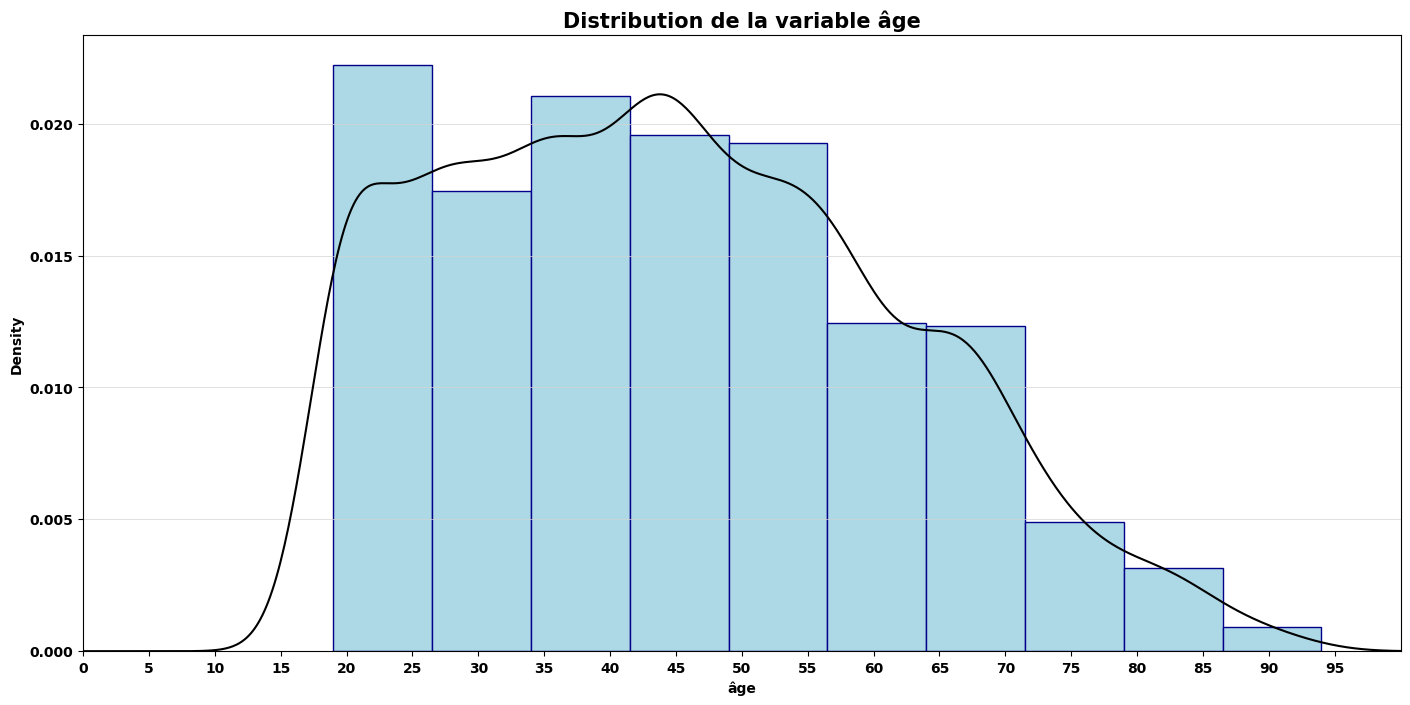

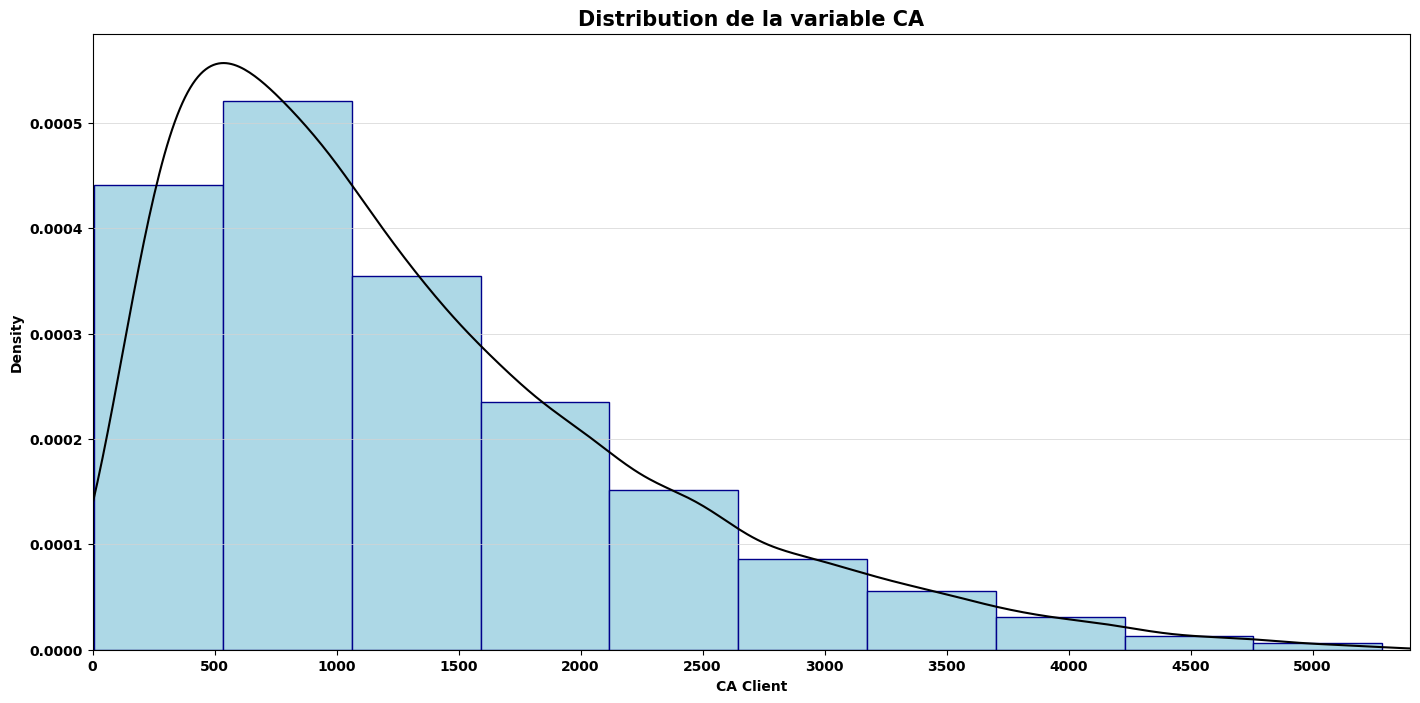

In [79]:
# Distribution variable âge
axes = plt.gca()

aggregated_data['age'].hist(density=True, bins=10, 
                               edgecolor="darkblue", 
                               color='lightblue')
aggregated_data.age.plot.density(color="black")

plt.grid(color='lightgrey', linestyle='-', axis='y', linewidth=0.5)
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, step=5))
plt.xlabel('âge', fontsize=10)
plt.title('Distribution de la variable âge', fontsize=15, 
          fontweight='bold')
plt.savefig('distri_age.png', dpi=300, bbox_inches='tight')
plt.show()

# Distribution variable CA
axes = plt.gca()

aggregated_data['total_price'].hist(density=True, bins=10, 
                               edgecolor="darkblue", 
                               color='lightblue')
aggregated_data.total_price.plot.density(color="black")

plt.grid(color='lightgrey', linestyle='-', axis='y', linewidth=0.5)
plt.xlim(0, 5_400)
plt.xticks(np.arange(0, 5_400, step=500))
plt.xlabel('CA Client', fontsize=10)
plt.title('Distribution de la variable CA', fontsize=15, 
          fontweight='bold')
plt.savefig('distri_ca.png', dpi=300, bbox_inches='tight')
plt.show()

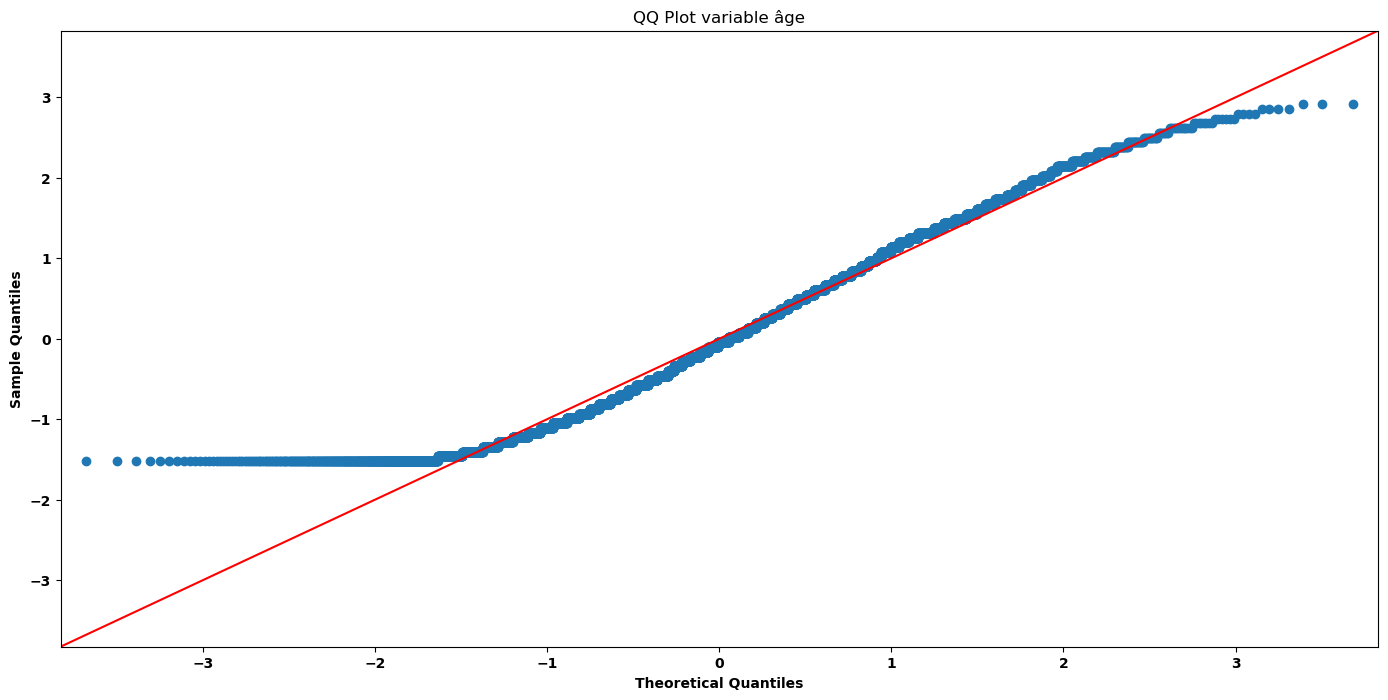

Nous avons précédemment constaté une erreur au niveau de l'âge renseigné pour les 18 ans. Nous n'avons pas modifié ni supprimé ces données mais cela fausse probablement la distribution cette variable qui aurait pu être normale sans ca.


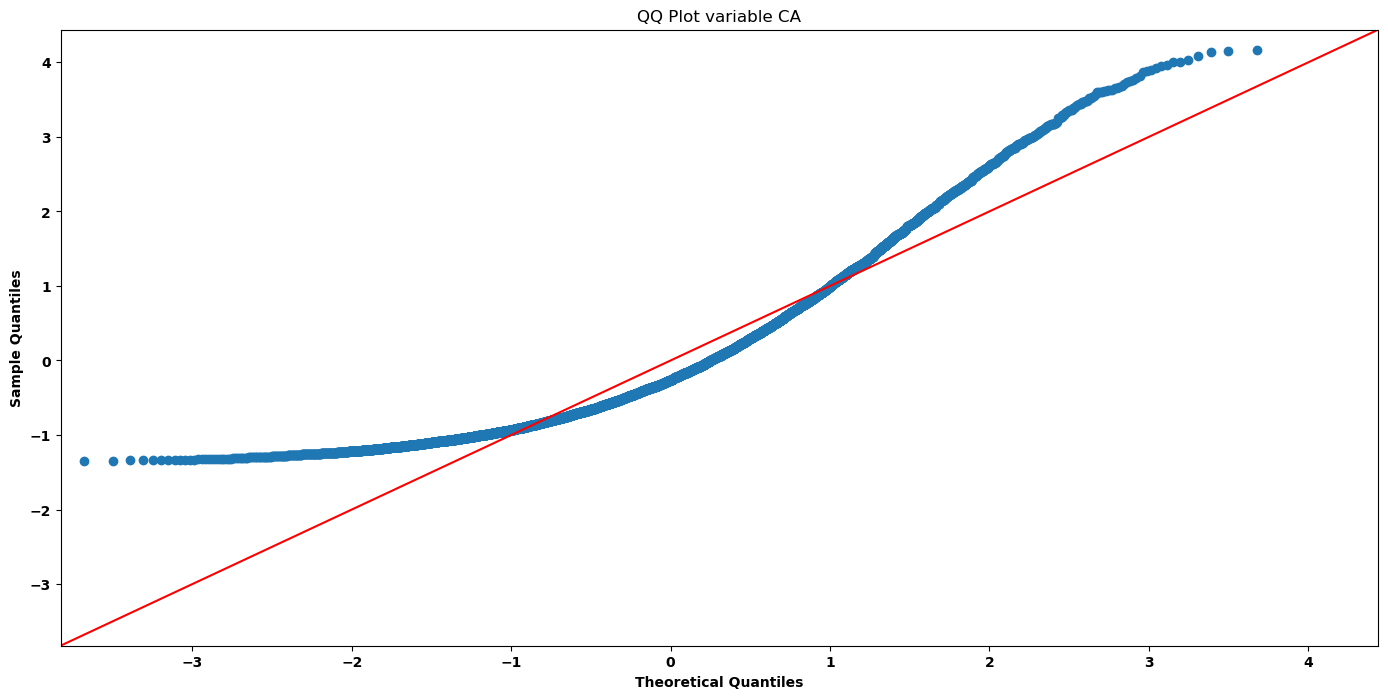

In [80]:
# QQ plot Age
sm.qqplot(aggregated_data.age, line='45', fit=True)
plt.title("QQ Plot variable âge")
plt.show()

print('Nous avons précédemment constaté une erreur au niveau de l\'âge '
      'renseigné pour les 18 ans. Nous n\'avons pas modifié ni supprimé '
      'ces données mais cela fausse probablement la distribution cette '
      'variable qui aurait pu être normale sans ca.')

# QQ plot CA
sm.qqplot(aggregated_data.total_price, line='45', fit=True)
plt.title("QQ Plot variable CA")
plt.show()

On pose les hypothèses suivantes afin de tester la normalité des variables age et CA :  
H0 : la variable suit la loi normale  
H1 : la variable ne suit pas la loi normale

In [81]:
# Normalité de la variable âge
print("Normalité de la variable âge : \n")
test_kolmogorov(aggregated_data, 'age')

print('La variable pouvant être considérée comme un petit échantillon, on applique '
      'le test de Shapiro pour confirmer le résultat du test de Kolmogorov.\n')

test_shapiro(aggregated_data, 'age')

# Normalité de la variable CA
print('\nNormalité de la variable CA :\n')
test_kolmogorov(aggregated_data, 'total_price')

Normalité de la variable âge : 

Test de Kolmogorov result =  0.9871794871794872
Test de Kolmogorov pvalue =  5.21976541844878e-148
H1: la variable ne suit pas la loi normale.

La variable pouvant être considérée comme un petit échantillon, on applique le test de Shapiro pour confirmer le résultat du test de Kolmogorov.

Test de Shapiro result =  0.9697331786155701
Test de Shapiro pvalue =  4.628808323714737e-39
H1: la variable ne suit pas la loi normale.


Normalité de la variable CA :

Test de Kolmogorov result =  0.9102564102564102
Test de Kolmogorov pvalue =  4.342078445549507e-82
H1: la variable ne suit pas la loi normale.



C:\Users\pauli\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Les variables sont quantitatives, nous pourrions utiliser le test de corrélation de Pearson dont les conditions de validité sont les suivantes :  
 - Chaque variable suit une distribution normale  
 - Au moins 20 individus dans l'échantillon  
 
Nous venons de tester la normalité des variables et elles ne suivent pas la loi normale. 
Par conséquent le test de Pearson ne sera pas réalisé, nous utiliserons plutôt son équivalent non paramétrique pour vérifier la corrélation entre les deux.

In [82]:
aggregated_data = data_maj.groupby(['age']).agg(
    total_price = ('price', 'sum'),
    moy_price   = ('price', 'mean'), 
    nbre_produits = ('id_prod', 'nunique'), 
    nbre_ventes = ('quantite', 'sum'),
    nbre_clients  = ('client_id', 'nunique')
).reset_index()

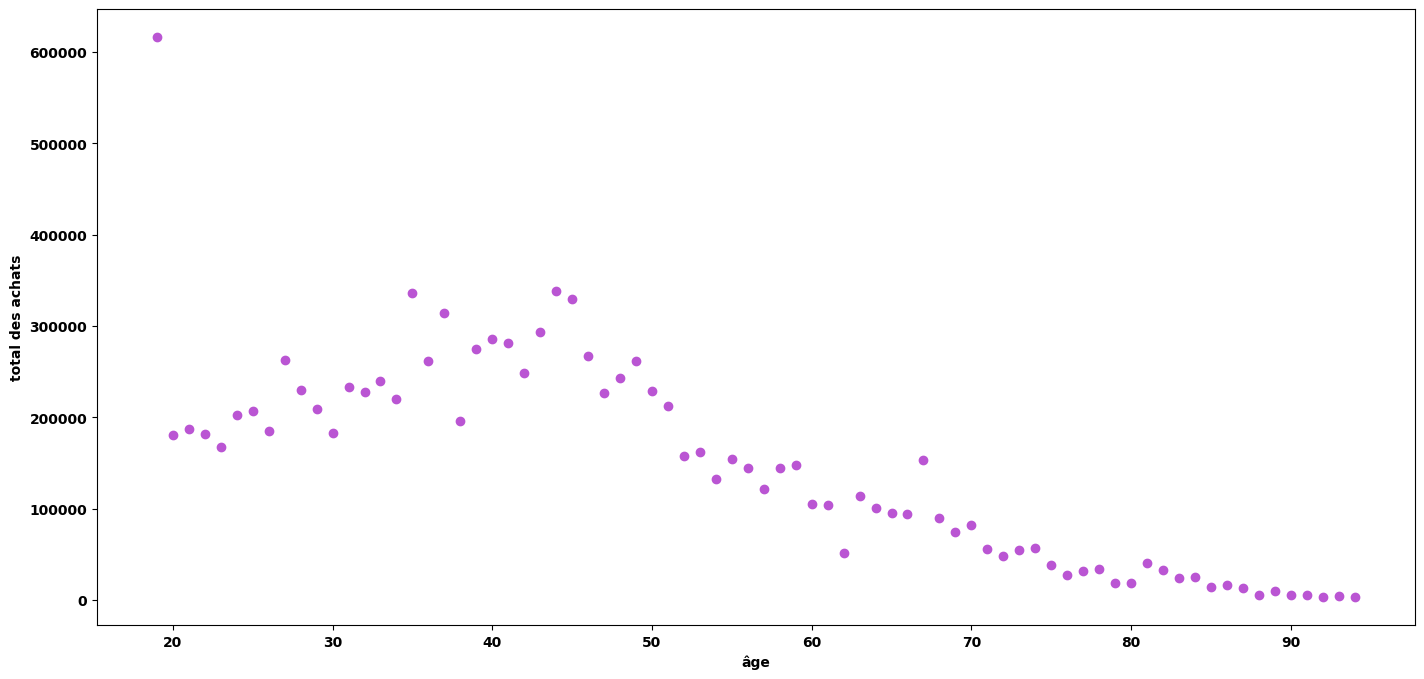

Corrélation de Spearman : -0.8744497607655503
Spearman p-value : 5.956077505475151e-25
H0 est rejetée : Il y a une corrélation significative.



In [83]:
# Représentation graphique CA par âge 
plt.plot(aggregated_data['age'],aggregated_data['total_price'],'o', color = 'mediumorchid')
plt.xlabel("âge")
plt.ylabel("total des achats")
plt.savefig('scatter_age_achat.png', dpi=300, bbox_inches='tight')
plt.show()


test_spearman(aggregated_data, 'age', 'total_price')

En utilisant une méthode de discrétisation sur la variable âge, celle-ci devient une variable qualitative. De cette manière nous pouvons réaliser une ANOVA (variable qualitative et quantitative). Si les conditions de validité n'étaient pas respectées, nous viendront compléter l'analyse avec son penchant non paramétrique(Kruskall-Wallis).

In [84]:
# Discrétisation par tranches d'âge de 10 ans
data_maj['classe_age'] = '17-29'
data_maj['classe_age'].loc[data_maj[data_maj['age']>=30].index] = '30-39'
data_maj['classe_age'].loc[data_maj[data_maj['age']>=40].index] = '40-49'
data_maj['classe_age'].loc[data_maj[data_maj['age']>=50].index] = '50-59'
data_maj['classe_age'].loc[data_maj[data_maj['age']>=60].index] = '60-69'
data_maj['classe_age'].loc[data_maj[data_maj['age']>=70].index] = '70-79'
data_maj['classe_age'].loc[data_maj[data_maj['age']>=80].index] = '80 et +'

C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2900696114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_maj['classe_age'].loc[data_maj[data_maj['age']>=30].index] = '30-39'
C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2900696114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_maj['classe_age'].loc[data_maj[data_maj['age']>=40].index] = '40-49'
C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2900696114.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [85]:
aggregated_data = data_maj.groupby(['classe_age', 'age']).agg(
    total_price = ('price', 'sum'),
    moy_price   = ('price', 'mean'), 
    nbre_produits = ('id_prod', 'nunique'), 
    nbre_ventes = ('quantite', 'sum'),
    nbre_clients  = ('client_id', 'nunique')
).reset_index()

In [86]:
aggregated_data.sort_values(by='classe_age').reset_index(inplace=True)

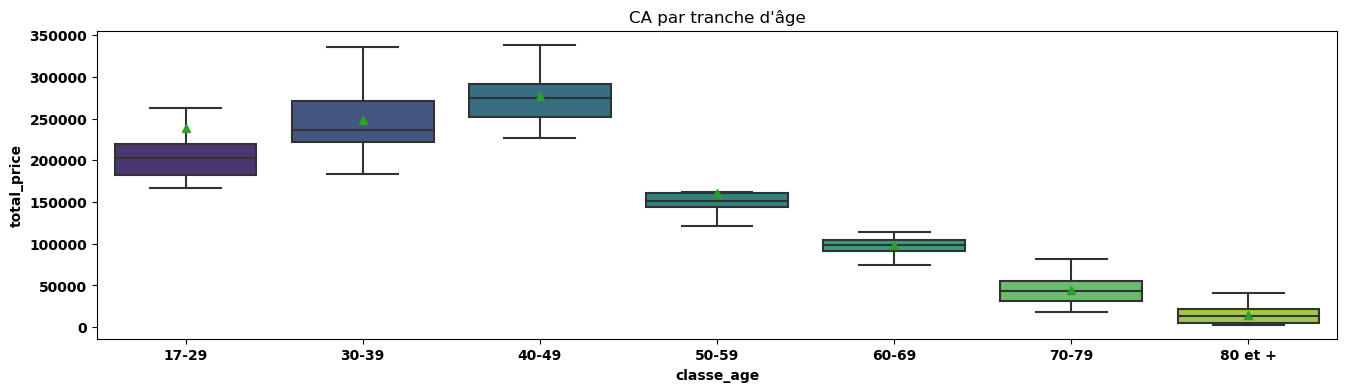

In [87]:
# Représentation graphique par classe d'âge
plt.figure(figsize=(16,4))

sns.boxplot(data=aggregated_data, y='total_price', x='classe_age', showfliers = False, 
            showmeans = True, palette = 'viridis')

plt.title('CA par tranche d\'âge')
plt.savefig('boxplot_ca_age.png', dpi=300, bbox_inches='tight')
plt.show()

In [88]:
# CA moyen par classe d'âge
moyenne(aggregated_data,('classe_age'),['total_price'])

,classe_age,total_price
0,17-29,238985.559091
1,30-39,248570.273000
2,40-49,277617.628000
3,50-59,160648.984000
4,60-69,98109.151000
5,70-79,44644.240000
6,80 et +,14574.873333


<h3 style="margin: auto; padding: 8px; ">Analyse ANOVA</h3>

Conditions de validité :  
   - Les mesures sont indépendantes  
   - Les échantillons ont des variances égales  (vérifié avec un test d'égalité des variances (homoscédasticité))
   - Les résidus suivent une distribution normale (vérifié avec un test de normalité des résidus)
   - Au moins 20 individus dans le dispositif, ou normalité des résidus supposée ou vérifiée  
   
Avant de procéder à l'analyse des variances, nous vérifierons chacune des conditions de validité de l'ANOVA.

### Indépendance des groupes et nombre d'observations

L’indépendance est une des 3 conditions de validité d’une ANOVA. Chaque groupe (tranches d'âge) présente des observations différentes, on peut donc parler d'indépendance des groupes, la condition est validée.

Il y a plus de 20 individus dans l'échantillon, la condition est validée.

### Egalité des variances

Le test de Bartlett est très sensible aux écarts de normalité, il ne sera donc pas utlisé ici car les variables ne suivent pas la loi normale. 
Au vu du nombre d'observations, nous effecturons un test de Levene qui permet de tester si les variances sont significativement différentes ou non avec les hypothèses suivantes :  

H0 : Les variances de chaque groupe sont égales si p-value > 5%  
H1 : Les variances de chaque groupe ne sont pas toutes égales si p-value < 5%

Ce test est moins sensible aux écarts de normalité, mais suppose tout de même une distribution normale, nous confirmerons donc le résultat de ce test par son équivalent non paramétrique : Fligner-Killeen

In [89]:
age_17_29 = aggregated_data.total_price[aggregated_data.classe_age == '17-29']
age_30_39 = aggregated_data.total_price[aggregated_data.classe_age == '30-39']
age_40_49 = aggregated_data.total_price[aggregated_data.classe_age == '40-49']
age_50_59 = aggregated_data.total_price[aggregated_data.classe_age == '50-59']
age_60_69 = aggregated_data.total_price[aggregated_data.classe_age == '60-69']
age_70_79 = aggregated_data.total_price[aggregated_data.classe_age == '70-79']
age_80 = aggregated_data.total_price[aggregated_data.classe_age == '80 et +']

test_levene(age_17_29, age_30_39, age_40_49, age_50_59, age_60_69, age_70_79, age_80)

test_fligner(age_17_29, age_30_39, age_40_49, age_50_59, age_60_69, age_70_79, age_80)

Test de Levene result median : 1.2365777830118232  Test de Levene result mean : 2.9054712343883753
Test de Levene pvalue median : 0.29855149987605517  Test de Levene pvalue mean : 0.013857112318087263
H0 : Les variances de chaque groupe sont égales.La condition est validée.

Test de Fligner result : 11.955238837859014
Test de Fligner pvalue : 0.06297485286490809
H0 : Les variances de chaque groupe sont égales. La condition est validée.



### Normalité des résidus

Enfin, nous effectuons un test de Shapiro pour tester la normalité des résidus. L’objectif étant de s’assurer que les résidus suivent une loi normale afin de ne pas affirmer qu’il existe une différence de moyenne entre les groupes qui serait causée par le hasard.

On pose les hypothèses suivantes :

H0 : Les résidus suivent une loi normale si p-value > 5%  
H1 : Les résidus ne suivent pas une loi normale si p-value < 5%

In [90]:
test_shapiro_resid(aggregated_data, aggregated_data.total_price, aggregated_data.classe_age)

Shapiro résidus result : 0.6214607357978821
Shapiro résidus pvalue : 1.0702427442541018e-12
H1 : Les résidus ne suivent pas une loi normale. La condition n'est pas validée.



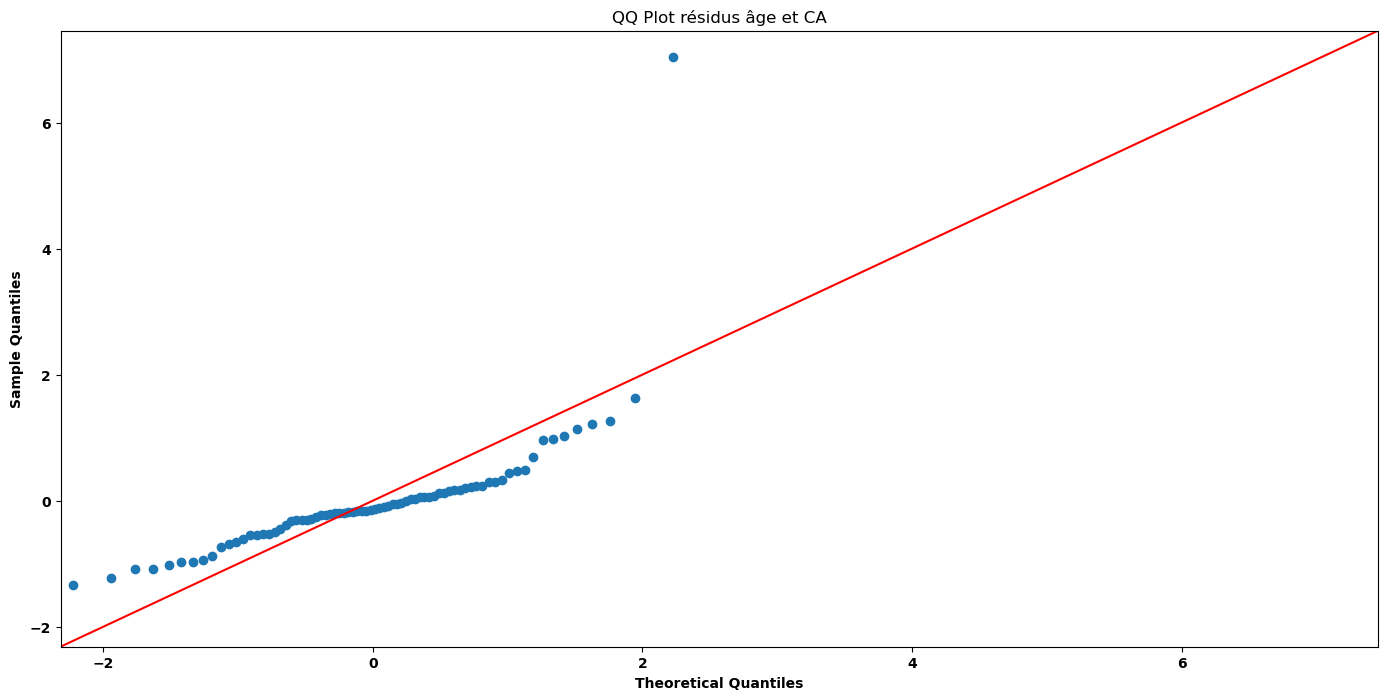

In [91]:
residus_ca = residual(aggregated_data, aggregated_data.total_price, aggregated_data.classe_age)

# QQ plot résidus âge et CA
sm.qqplot(residus_ca, line='45', fit=True)
plt.title("QQ Plot résidus âge et CA")
plt.show()

Avec l'application du test Anova, on constate que :   
 - les résidus ne suivent pas la loi normale
 
Seule la normalité des résidus n'est pas validée mais les observations sont nombreuses. Nous procèderons tout de même à l'analyse ANOVA et confirmerons le résultat avec son équivalent non paramétrique, le test de Kruskall Wallis.

Nous effectuons dans un premier temps la méthode des moindres carrés pour tester si les moyennes sont égales ou non.  
On pose les hypothèses suivantes :  
H0 : Les moyennes de chaque groupe sont égales si p-value > 5%  
H1 : Les moyennes de chaque groupe ne sont pas toutes égales si p-value < 5%  

In [92]:
test_anova(aggregated_data, aggregated_data.total_price, aggregated_data.classe_age)
residus = residual(aggregated_data, aggregated_data.total_price, aggregated_data.classe_age)

Anova :                    sum_sq    df          F        PR(>F)
field_categ  7.604182e+11   6.0  40.008142  1.359643e-20
Residual     2.185757e+11  69.0        NaN           NaN 
pvalue : 1.3596426403528253e-20
H1 : Les moyennes de chaque groupe ne sont pas toutes égales.



In [93]:
# Test de Kruskall Wallis
test_kruskal(age_17_29, age_30_39, age_40_49, age_50_59, age_60_69, age_70_79, age_80)

Test de Kruskal result : 68.0073945193563
Test de Kruskal pvalue : 1.0469695838591642e-12
H1 : Les médianes de chaque groupe ne sont pas toutes égales, il existe une corrélation entre les variables.



L'ANOVA et Kruskall Wallis montrent un lien entre âge et CA, plus ils sont âgés moins ils dépensent.

### 2-Lien entre l'âge des clients et la fréquence d’achat

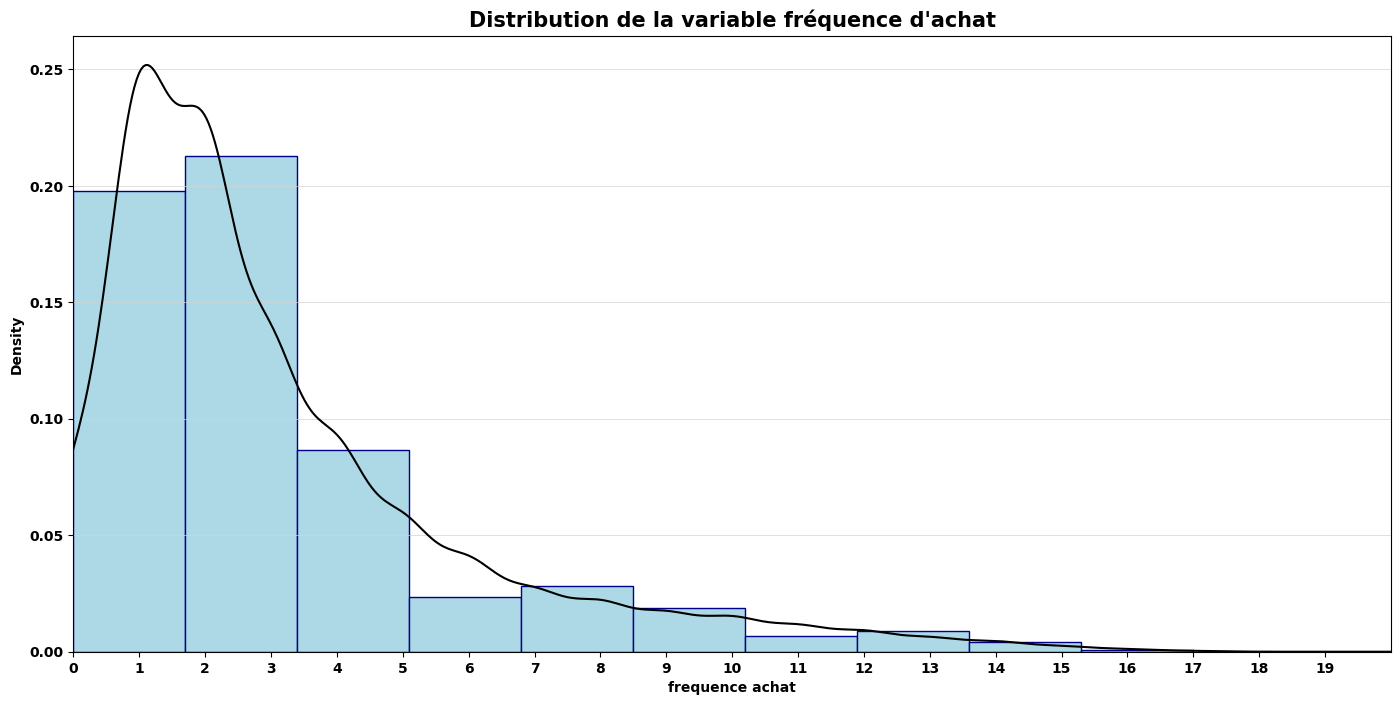

In [94]:
# Distribution variable fréquence d'achat
axes = plt.gca()

aggregated_data_customer['frequence_achat'].hist(density=True, bins=10, 
                               edgecolor="darkblue", 
                               color='lightblue')
aggregated_data_customer.frequence_achat.plot.density(color="black")

plt.grid(color='lightgrey', linestyle='-', axis='y', linewidth=0.5)
plt.xlim(0, 20)
plt.xticks(np.arange(0, 20, step=1))
plt.xlabel('frequence achat', fontsize=10)
plt.title('Distribution de la variable fréquence d\'achat', fontsize=15, 
          fontweight='bold')
plt.savefig('distri_freq.png', dpi=300, bbox_inches='tight')
plt.show()

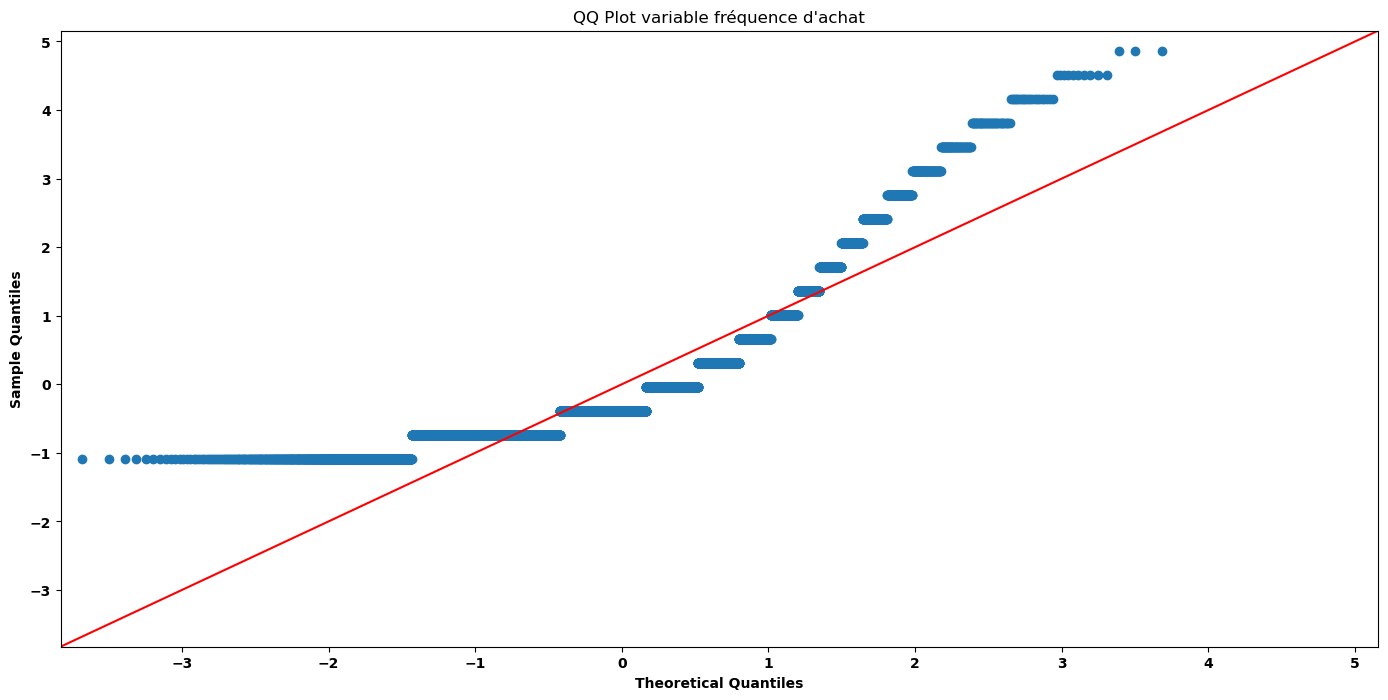

In [95]:
# QQ plot variable fréquence d'achat
sm.qqplot(aggregated_data_customer.frequence_achat, line='45', fit=True)
plt.title("QQ Plot variable fréquence d'achat")
plt.show()

On émet les hypothèses suivantes :  
H0 : la variable suit la loi normale  
H1 : la variable ne suit pas la loi normale  

In [96]:
print('L\'échantillon étant très petit, nous utiliserons le test de normalité de Shapiro-Wilk')

test_shapiro(aggregated_data_customer, 'frequence_achat')

L'échantillon étant très petit, nous utiliserons le test de normalité de Shapiro-Wilk
Test de Shapiro result =  0.8126823902130127
Test de Shapiro pvalue =  0.0
H1: la variable ne suit pas la loi normale.



C:\Users\pauli\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Bien que les deux variables soient de nature quantitatives, nous ne pourrons réaliserons un test de Student car aucunes des variables ne suit la loi normale et que le nombre de groupes est supérieur à 2. La représentation en nuage de point n'est pas bonne donc le coefficiant de corrélation de Pearson ne pourra être utilisé non plus.  
Nous appliquerons alors une méthode de discrétisation de la variable âge pour que celle-ci ne soit plus numérique et que l'on puisse procéder à une ANOVA, suivi d'un test de Kruskall Wallis au besoin.

In [97]:
#Discrétisation 
aggregated_data_customer['classe_age'] = '17-29'
aggregated_data_customer['classe_age'].loc[aggregated_data_customer[aggregated_data_customer['age']>=30].index] = '30-39'
aggregated_data_customer['classe_age'].loc[aggregated_data_customer[aggregated_data_customer['age']>=40].index] = '40-49'
aggregated_data_customer['classe_age'].loc[aggregated_data_customer[aggregated_data_customer['age']>=50].index] = '50-59'
aggregated_data_customer['classe_age'].loc[aggregated_data_customer[aggregated_data_customer['age']>=60].index] = '60-69'
aggregated_data_customer['classe_age'].loc[aggregated_data_customer[aggregated_data_customer['age']>=70].index] = '70-79'
aggregated_data_customer['classe_age'].loc[aggregated_data_customer[aggregated_data_customer['age']>=80].index] = '80 et +'

C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2104322926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_data_customer['classe_age'].loc[aggregated_data_customer[aggregated_data_customer['age']>=30].index] = '30-39'
C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2104322926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_data_customer['classe_age'].loc[aggregated_data_customer[aggregated_data_customer['age']>=40].index] = '40-49'
C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2104322926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

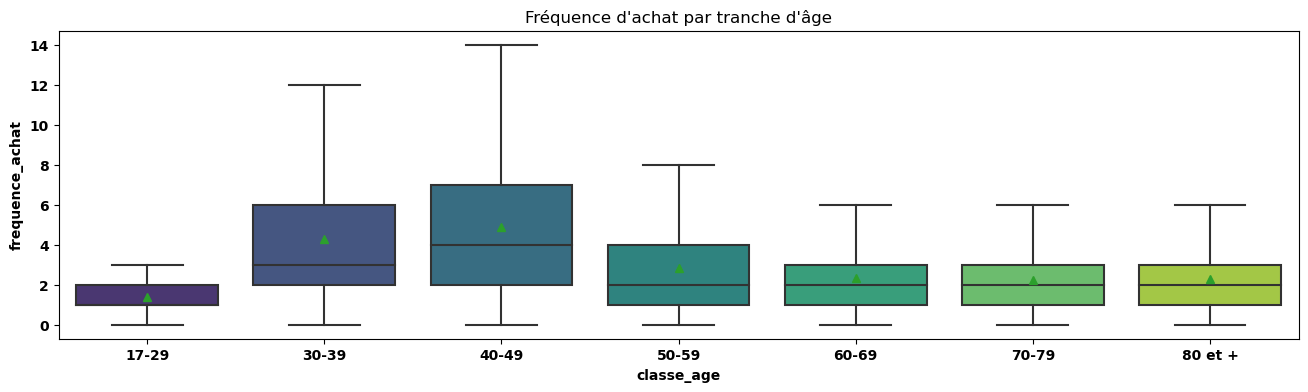

In [98]:
#Représentation graphique par classe d'âge
aggregated_data_freq = aggregated_data_customer.sort_values(by='classe_age').reset_index()

plt.figure(figsize=(16,4))
sns.boxplot(data=aggregated_data_freq, y='frequence_achat', x='classe_age', 
            showfliers = False, showmeans = True, palette = 'viridis')
plt.title('Fréquence d\'achat par tranche d\'âge')
plt.savefig('boxplot_freq_age.png', dpi=300, bbox_inches='tight')
plt.show()

In [99]:
# Moyenne des âges par CA
print(moyenne(aggregated_data_customer,('classe_age'),['frequence_achat']))

# Egalité des variances
classe_17_29 = aggregated_data_customer.frequence_achat[aggregated_data_customer.classe_age == '17-29']
classe_30_39 = aggregated_data_customer.frequence_achat[aggregated_data_customer.classe_age == '30-39']
classe_40_49 = aggregated_data_customer.frequence_achat[aggregated_data_customer.classe_age == '40-49']
classe_50_59 = aggregated_data_customer.frequence_achat[aggregated_data_customer.classe_age == '50-59']
classe_60_69 = aggregated_data_customer.frequence_achat[aggregated_data_customer.classe_age == '60-69']
classe_70_79 = aggregated_data_customer.frequence_achat[aggregated_data_customer.classe_age == '70-79']
classe_80 = aggregated_data_customer.frequence_achat[aggregated_data_customer.classe_age == '80 et +']
print('\nEgalité des variances :\n')
test_levene(classe_17_29, classe_30_39, classe_40_49, classe_50_59, classe_60_69, classe_70_79, classe_80)
test_fligner(classe_17_29, classe_30_39, classe_40_49, classe_50_59, classe_60_69, classe_70_79, classe_80)

# Normalité des résidus
print('\nNormalité des résidus :\n')
test_shapiro_resid(aggregated_data_customer, 
                   aggregated_data_customer.frequence_achat, 
                   aggregated_data_customer.classe_age)

  classe_age  frequence_achat
0      17-29         1.392490
1      30-39         4.281038
2      40-49         4.892455
3      50-59         2.859826
4      60-69         2.344358
5      70-79         2.213861
6    80 et +         2.296137

Egalité des variances :

Test de Levene result median : 263.49904802334896  Test de Levene result mean : 424.5855896539166
Test de Levene pvalue median : 1.6870925329138e-310  Test de Levene pvalue mean : 0.0
H1 : Les variances de chaque groupe ne sont pas toutes égales. La condition n'est pas validée.

Test de Fligner result : 1559.282531890543
Test de Fligner pvalue : 0.0
H1 : Les variances de chaque groupe ne sont pas toutes égales. La condition n'est pas validée.


Normalité des résidus :

Shapiro résidus result : 0.9118974208831787
Shapiro résidus pvalue : 0.0
H1 : Les résidus ne suivent pas une loi normale. La condition n'est pas validée.



C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2374491686.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return dt.groupby(column).mean()[field].reset_index()
C:\Users\pauli\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


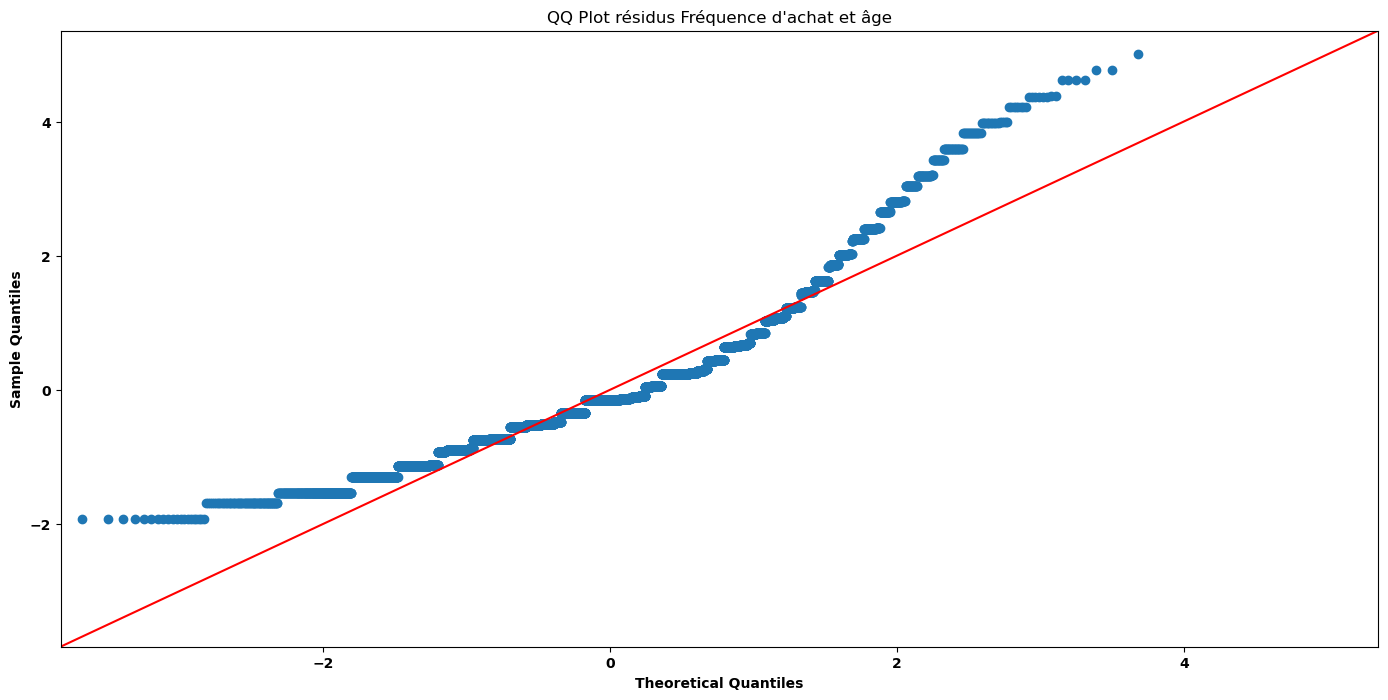

In [100]:
residus_freq = residual(aggregated_data_customer, 
                        aggregated_data_customer.frequence_achat, 
                        aggregated_data_customer.classe_age)

# QQ plot résidus fréquence age
sm.qqplot(residus_freq, line='45', fit=True)
plt.title("QQ Plot résidus Fréquence d'achat et âge")
plt.show()

Après vérification des conditions de validité :
  
les variances sont différentes,  
les résidus ne suivent pas la loi normale.  

Les conditions de validité d'une ANOVA n'étant pas validées, nous ne procèderons pas à l'ANOVA ici. 
Nous utiliserons l'équivalence non paramétrique, le test de Kruskal-Wallis.

On pose les hypothèses suivantes :    
H0 : Les médianes de chaque groupe sont égales    
H1 : Les médianes de chaque groupe ne sont pas toutes égales.

In [101]:
test_kruskal(classe_17_29, classe_30_39, classe_40_49, classe_50_59, classe_60_69, classe_70_79, classe_80)

print('\nLe test de Kruskal Wallis a mis en lumière un lien entre la fréquence '
      'd\'achat et l\'âge des clients; les 30-50 ans sont ceux qui achètent le '
      'plus avec une moyenne de 4 achats par mois, les 17-29 ans achètent 1 fois '
      'par mois et les plus de 50 ans 2 à 3 fois.')

Test de Kruskal result : 1881.3155280614849
Test de Kruskal pvalue : 0.0
H1 : Les médianes de chaque groupe ne sont pas toutes égales, il existe une corrélation entre les variables.


Le test de Kruskal Wallis a mis en lumière un lien entre la fréquence d'achat et l'âge des clients; les 30-50 ans sont ceux qui achètent le plus avec une moyenne de 4 achats par mois, les 17-29 ans achètent 1 fois par mois et les plus de 50 ans 2 à 3 fois.


### 3-Lien entre l'âge des clients et panier moyen

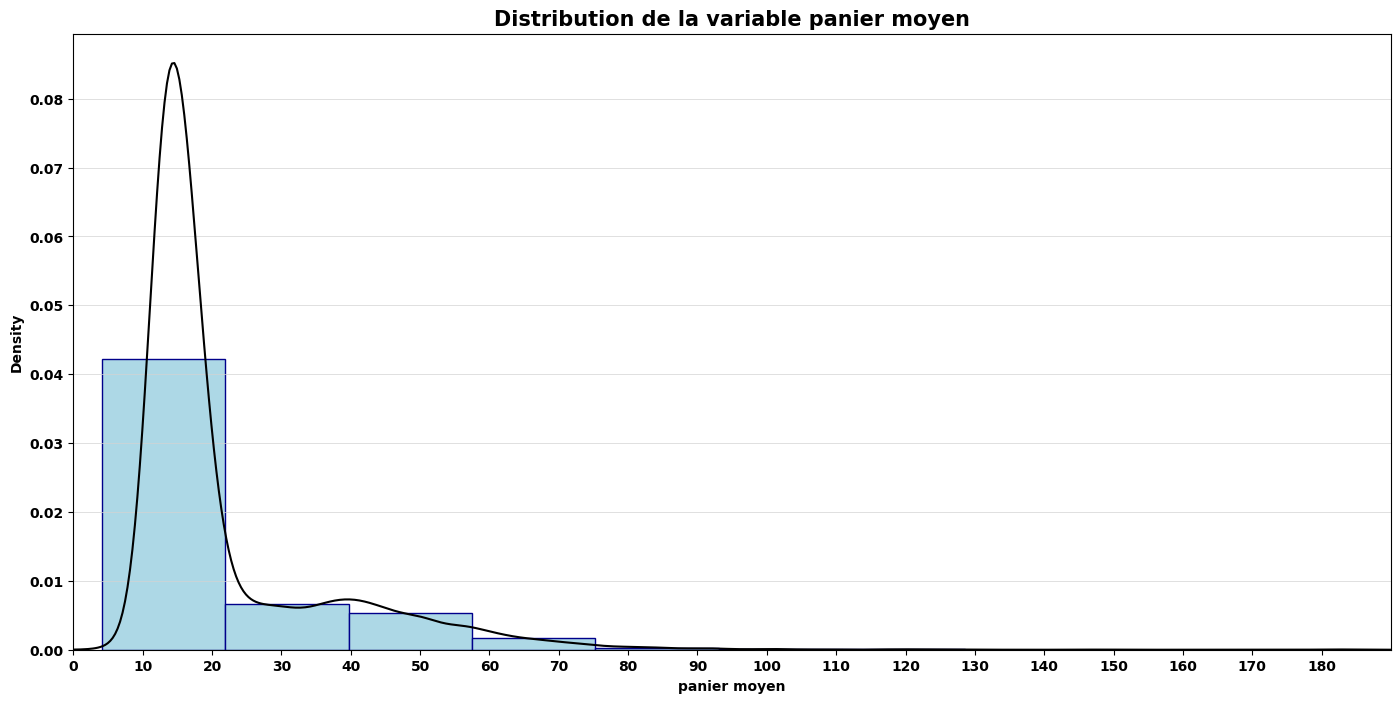

In [102]:
# Distribution variable panier_moyen
axes = plt.gca()

aggregated_data_customer['panier_moyen'].hist(density=True, bins=10, 
                               edgecolor="darkblue", 
                               color='lightblue')
aggregated_data_customer.panier_moyen.plot.density(color="black")

plt.grid(color='lightgrey', linestyle='-', axis='y', linewidth=0.5)
plt.xlim(0, 190)
plt.xticks(np.arange(0, 190, step=10))
plt.xlabel('panier moyen', fontsize=10)
plt.title('Distribution de la variable panier moyen', fontsize=15, 
          fontweight='bold')
plt.savefig('distri_panier_moyen.png', dpi=300, bbox_inches='tight')
plt.show()

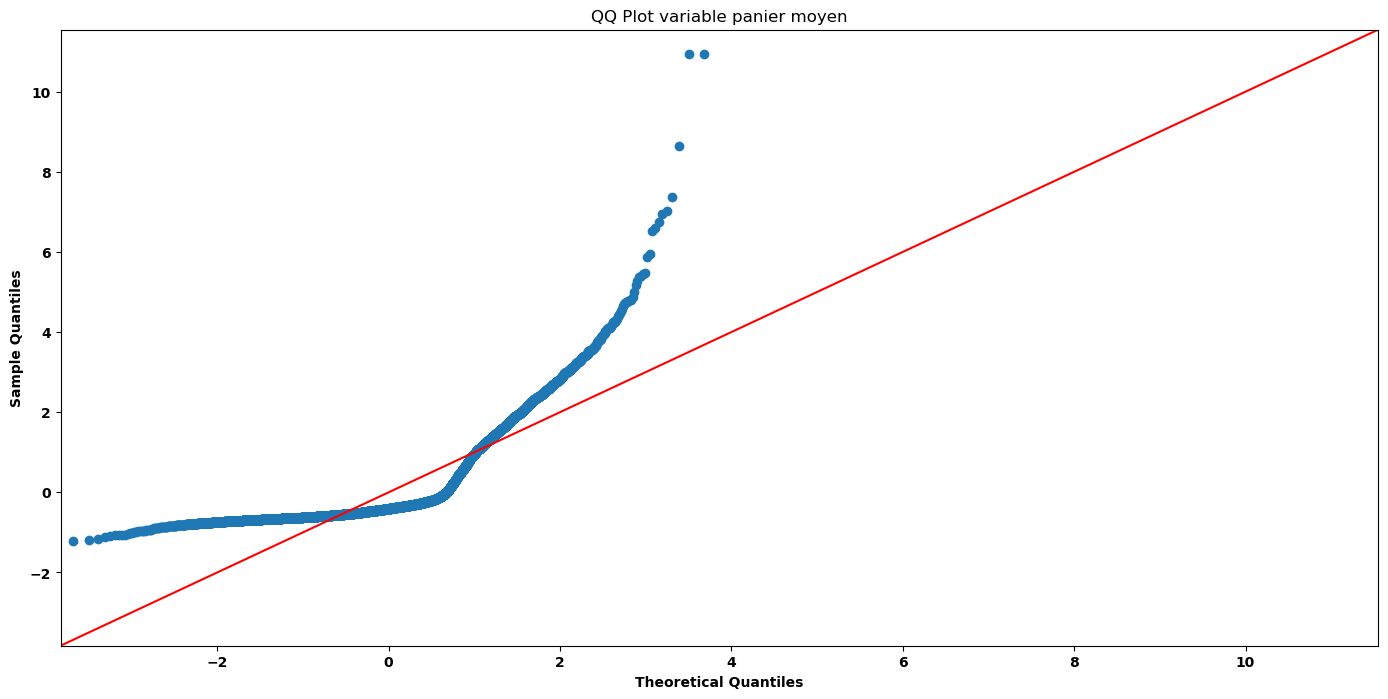

In [103]:
# QQ plot panier moyen
sm.qqplot(aggregated_data_customer.panier_moyen, line='45', fit=True)
plt.title("QQ Plot variable panier moyen")
plt.show()

On émet les hypothèses suivantes :  
H0 : la variable suit la loi normale  
H1 : la variable ne suit pas la loi normale  

In [104]:
# Normalité de la variable panier moyen
test_kolmogorov(aggregated_data_customer, 'panier_moyen')

Test de Kolmogorov result =  0.9102157838351974
Test de Kolmogorov pvalue =  4.498233044795445e-82
H1: la variable ne suit pas la loi normale.



Nous choisissons la variable âge discrétisée afin d'utiliser une ANOVA

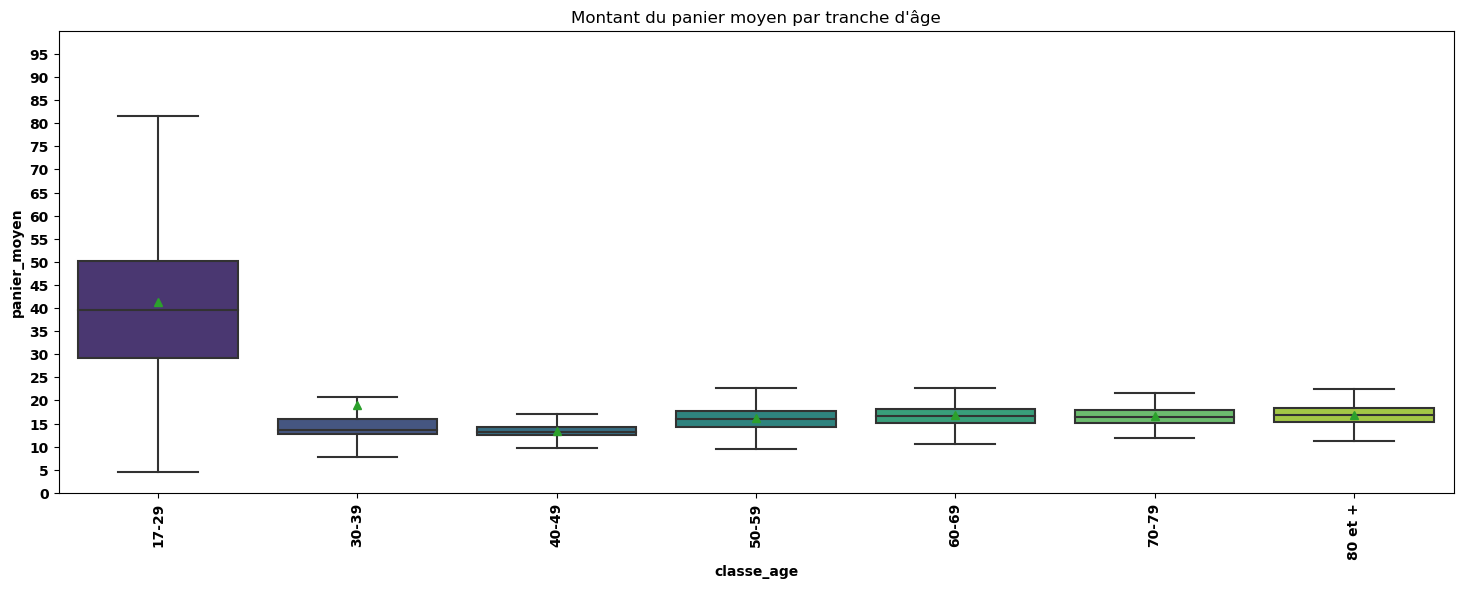

In [105]:
aggregated_data_panier = aggregated_data_customer.sort_values(by='classe_age').reset_index()

# Représentation graphique par classe d'âge
plt.figure(figsize=(18,6))
sns.boxplot(data=aggregated_data_panier, y= 'panier_moyen', x='classe_age',showfliers=False,
            showmeans=True, palette = 'viridis')

plt.xticks(rotation=90)
plt.ylim(0, 100)
plt.yticks(np.arange(0, 100, step = 5))
plt.title('Montant du panier moyen par tranche d\'âge')
plt.savefig('boxplot_panier.png', dpi=300, bbox_inches='tight')
plt.show()

In [106]:
# Moyenne des âges par CA
print(moyenne(aggregated_data_customer,('classe_age'),['panier_moyen']))

# Egalité des variances 
classe1 = aggregated_data_customer.panier_moyen[aggregated_data_customer.classe_age == '17-29']
classe2 = aggregated_data_customer.panier_moyen[aggregated_data_customer.classe_age == '30-39']
classe3 = aggregated_data_customer.panier_moyen[aggregated_data_customer.classe_age == '40-49']
classe4 = aggregated_data_customer.panier_moyen[aggregated_data_customer.classe_age == '50-59']
classe5 = aggregated_data_customer.panier_moyen[aggregated_data_customer.classe_age == '60-69']
classe6 = aggregated_data_customer.panier_moyen[aggregated_data_customer.classe_age == '70-79']
classe7 = aggregated_data_customer.panier_moyen[aggregated_data_customer.classe_age == '80 et +']

print('\nEgalité des variances :\n')
test_levene(classe1, classe2, classe3, classe4, classe5, classe6, classe7)
test_fligner(classe1, classe2, classe3, classe4, classe5, classe6, classe7)

# Normalité des résidus
print('\nNormalité des résidus :\n')
test_shapiro_resid(aggregated_data_customer, 
                   aggregated_data_customer.panier_moyen, 
                   aggregated_data_customer.classe_age)

  classe_age  panier_moyen
0      17-29     41.235066
1      30-39     18.913593
2      40-49     13.487123
3      50-59     16.118859
4      60-69     16.874041
5      70-79     16.667478
6    80 et +     16.933865

Egalité des variances :

Test de Levene result median : 459.4022760072074  Test de Levene result mean : 654.6051244354637
Test de Levene pvalue median : 0.0  Test de Levene pvalue mean : 0.0
H1 : Les variances de chaque groupe ne sont pas toutes égales. La condition n'est pas validée.

Test de Fligner result : 2924.191010274061
Test de Fligner pvalue : 0.0
H1 : Les variances de chaque groupe ne sont pas toutes égales. La condition n'est pas validée.


Normalité des résidus :

Shapiro résidus result : 0.7603311538696289
Shapiro résidus pvalue : 0.0
H1 : Les résidus ne suivent pas une loi normale. La condition n'est pas validée.



C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2374491686.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return dt.groupby(column).mean()[field].reset_index()
C:\Users\pauli\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


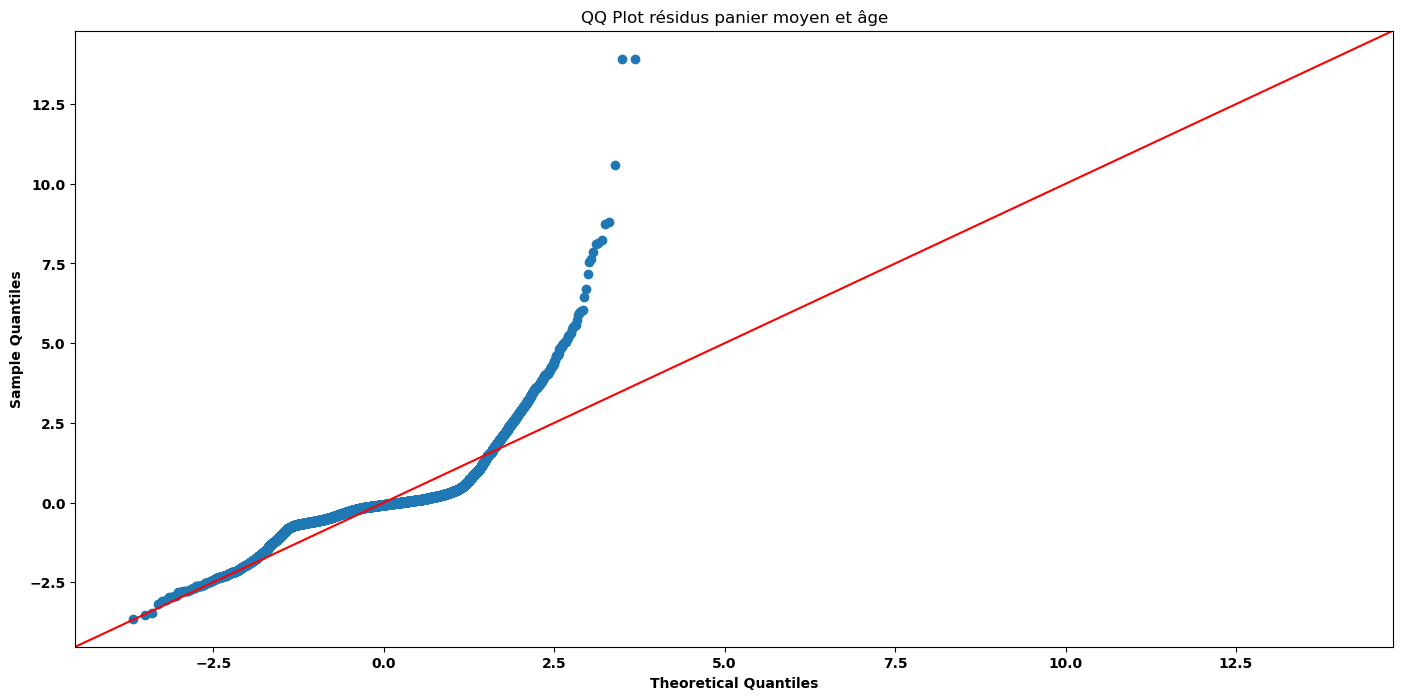

In [107]:
residus_panier = residual(aggregated_data_customer, 
                          aggregated_data_customer.panier_moyen,
                          aggregated_data_customer.classe_age)

# QQ plot résidus panier age
sm.qqplot(residus_panier, line='45', fit=True)
plt.title("QQ Plot résidus panier moyen et âge")
plt.show()

Après vérification des conditions de validité, on constate que :
  
les variances sont différentes,  
les résidus ne suivent pas la loi normale.  

Les conditions de validité d'une ANOVA n'étant pas validées, nous utiliserons un test non paramétrique de Kruskal-Wallis.

On pose les hypothèses suivantes :  
H0 : Les médianes de chaque groupe sont égales  
H1 : Les médianes de chaque groupe ne sont pas toutes égales.

In [108]:
test_kruskal(classe1, classe2, classe3, classe4, classe5, classe6, classe7)

print('\nLe test de Kruskal Wallis a démontré un lien entre le montant du '
      'panier moyen et l\'âge des clients, les 17-29 ans sont ceux qui ont '
      'le panier moyen le plus élevé, celui-ci diminue avec l\'âge.')

Test de Kruskal result : 4689.37783132584
Test de Kruskal pvalue : 0.0
H1 : Les médianes de chaque groupe ne sont pas toutes égales, il existe une corrélation entre les variables.


Le test de Kruskal Wallis a démontré un lien entre le montant du panier moyen et l'âge des clients, les 17-29 ans sont ceux qui ont le panier moyen le plus élevé, celui-ci diminue avec l'âge.


### 4-Lien entre l\'âge des clients et la catégorie des livres achetés

Pour cette corrélation à vérifier, une variable est quantitative et l'autre est de nature qualitative, nous réaliserons donc un test ANOVA pour infirmer ou confirmer la corrélation entre les deux.

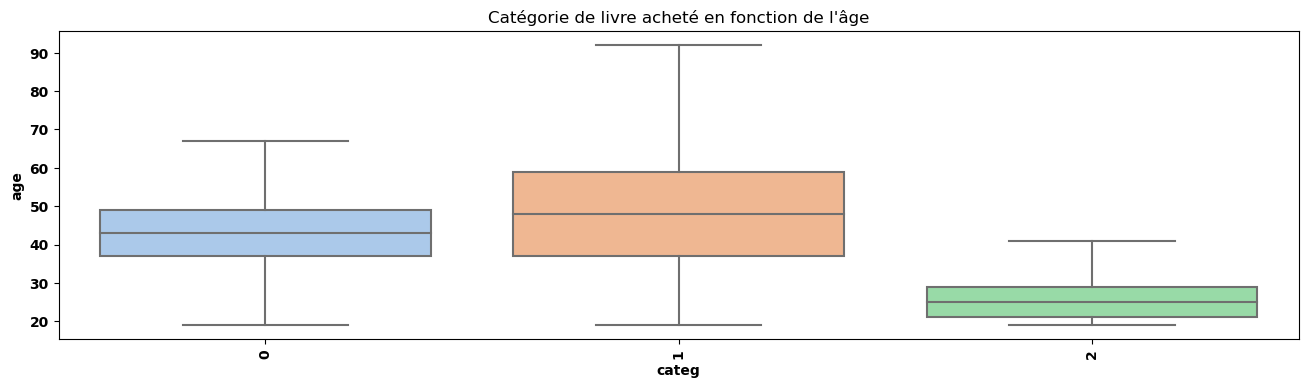

In [109]:
# Représentation graphique
plt.figure(figsize=(16,4))
sns.boxplot(data=data_maj, y='age', x='categ', showfliers = False, palette = 'pastel')
plt.xticks(rotation=90)
plt.title('Catégorie de livre acheté en fonction de l\'âge')
plt.savefig('categ_age.png', dpi=300, bbox_inches='tight')
plt.show()

In [110]:
# Moyenne des âges par catégorie
print(moyenne(data_maj,('categ'),['age']))

# Egalité des variances 
categ0 = data_maj.age[data_maj.categ == 0]
categ1 = data_maj.age[data_maj.categ == 1]
categ2 = data_maj.age[data_maj.categ == 2]

print('\nEgalité des variances\n')
test_levene(categ0, categ1, categ2)
test_fligner(categ0, categ1, categ2)

# Normalité des résidus
print('\nNormalité des résidus\n')
test_shapiro_resid(data_maj, data_maj.age, data_maj.categ)

C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2374491686.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return dt.groupby(column).mean()[field].reset_index()


  categ        age
0     0  44.794563
1     1  48.650035
2     2  26.965508

Egalité des variances

Test de Levene result median : nan  Test de Levene result mean : nan
Test de Levene pvalue median : nan  Test de Levene pvalue mean : nan
H1 : Les variances de chaque groupe ne sont pas toutes égales. La condition n'est pas validée.

Test de Fligner result : nan
Test de Fligner pvalue : nan
H1 : Les variances de chaque groupe ne sont pas toutes égales. La condition n'est pas validée.


Normalité des résidus



C:\Users\pauli\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\pauli\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shapiro résidus result : 0.9711387753486633
Shapiro résidus pvalue : 0.0
H1 : Les résidus ne suivent pas une loi normale. La condition n'est pas validée.



C:\Users\pauli\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


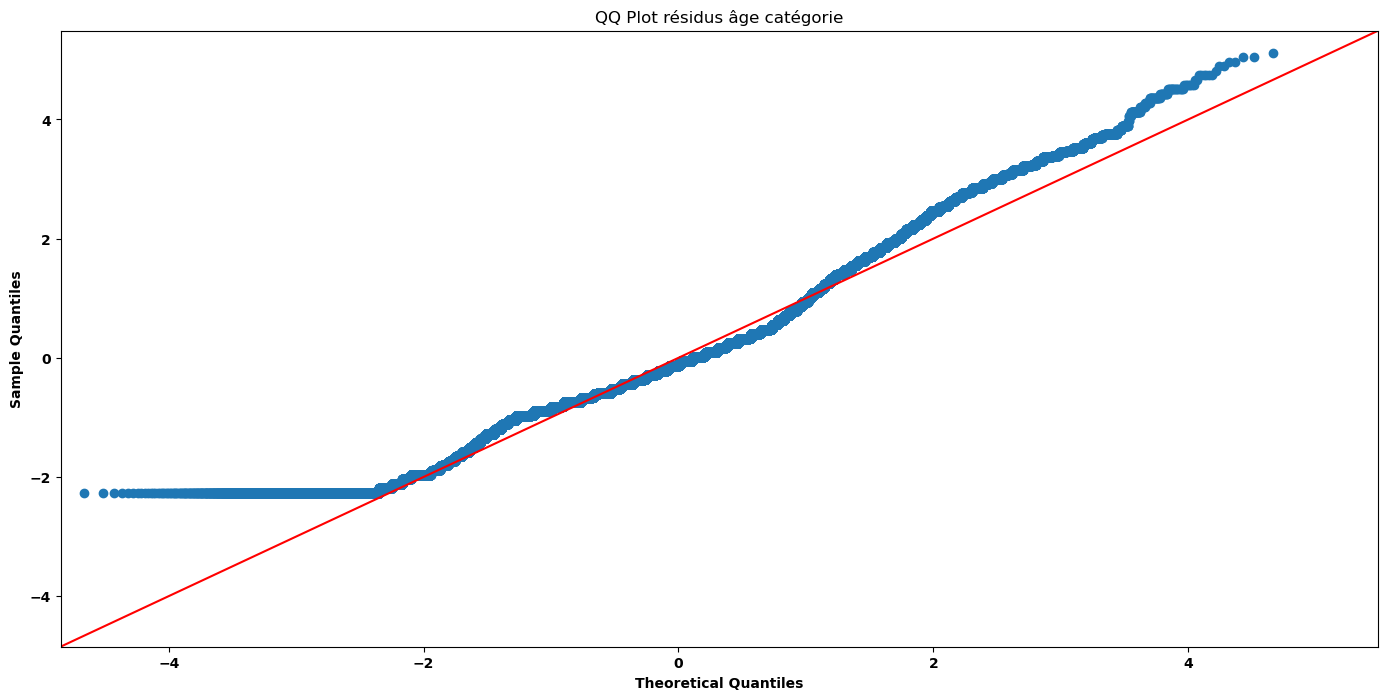

In [111]:
residus_age = residual(data_maj, data_maj.age, data_maj.categ)

# QQ plot résidus age categ
sm.qqplot(residus_age, line='45', fit=True)
plt.title("QQ Plot résidus âge catégorie")
plt.show()

Avec vérification des conditions de validité, on constate que :
  
les variances dont différentes,  
les résidus ne suivent pas la loi normale.  

Les conditions de validité d'une ANOVA n'étant pas validées, nous utiliserons un test non paramétrique de Kruskal-Wallis. 

On pose les hypothèses suivantes :  
H0 : Les médianes de chaque groupe sont égales  
H1 : Les médianes de chaque groupe ne sont pas toutes égales.

In [112]:
test_kruskal(categ0, categ1, categ2)

print('\nLe test de Kruskal Wallis a démontré un lien entre la catégorie de '
      'livre acheté et l\'âge des clients, les 17-29 ans achètent la catégorie de livres la plus onéreuse.')

Test de Kruskal result : nan
Test de Kruskal pvalue : nan
H1 : Les médianes de chaque groupe ne sont pas toutes égales, il existe une corrélation entre les variables.


Le test de Kruskal Wallis a démontré un lien entre la catégorie de livre acheté et l'âge des clients, les 17-29 ans achètent la catégorie de livres la plus onéreuse.


### 5-Lien entre le genre des clients et les catégories de livres achetés

Sachant que les deux variables sont qualitatives, nous réaliserons un test de Chi-2 pour infirmer ou confirmer la corrélation entre les deux.

Commencons par créer le tableau de contingence, qui nous servira au calcul du Chi-2.

In [113]:
cont = data_maj[['categ', 'client_id', 'sex']].drop_duplicates()
tb_cont = pd.crosstab(cont.categ, cont.sex)
tb_cont['Total'] = tb_cont['f']+tb_cont['m']
tb_cont

sex,f,m,Total
categ,,,
0,4119,3773,7892
1,4394,4061,8455
2,1839,1754,3593


In [114]:
tb_cont_perc = pd.DataFrame(columns=['f_perc','m_perc','Total_perc'])
tb_cont_perc['f_perc'] = tb_cont['f']/tb_cont['Total']*100
tb_cont_perc['m_perc'] = tb_cont['m']/tb_cont['Total']*100
tb_cont_perc['Total_perc'] = tb_cont['Total']/19934*100
tb_cont_perc

,f_perc,m_perc,Total_perc
categ,,,
0,52.192093,47.807907,39.590649
1,51.969249,48.030751,42.414969
2,51.182856,48.817144,18.024481


Il ne semble pas y avoir de lien entre le genre et la catégorie achetée, confirmons cela avec le Khi-deux.

In [115]:
test_khi_2(tb_cont)

Test de Chi 2 (2 catégorielles)
Stat = 0.073
p-value = 0.78767583699352705650653660995885730
H0: il n'y a pas de lien entre les deux variables.



Les conditions de validité du Khi-2 sont :  
    - Les mesures sont indépendantes  
    - Pas d'effectifs théoriques inférieurs à 5 dans les cases du tableau.  
    
Celles-ci étant validées nous n'appliquerons pas de test exact de Fischer, l'équivalent paramétrique de Khi-deux.



<div style="background-color: RGB(51, 153, 102);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">III.III - Analyse top clients</h2>
</div>

In [116]:
ca_top_client = calcul_ca(top_clients, top_clients['client_id'])
ca_top_client = ca_top_client[['client_id','price']]
ca_top_client.rename(columns={'price': 'total_sales'}, inplace = True)
ca_top_client ["perc_ca_total"] = ca_top_client.total_sales / ca_global *100
print('Ces 4 clients représentent à eux seuls' ,round(ca_top_client.perc_ca_total.sum(),2),
      '% du CA global sur les deux années.')

Ces 4 clients représentent à eux seuls 7.35 % du CA global sur les deux années.


C:\Users\pauli\AppData\Local\Temp\ipykernel_10324\2179605359.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return pd.DataFrame(dt.groupby(variable).sum().reset_index())


In [117]:
top_clients['quantite']=1

top_clients_agg = top_clients.groupby(['client_id','sex','categ','age']).agg(
    total_price = ('price', 'sum'),
    moy_price   = ('price', 'mean'), 
    nbre_produits = ('id_prod', 'nunique'), 
    nbre_ventes = ('quantite', 'sum')).reset_index()

top_clients_agg['frequence_achat'] = round(top_clients_agg.nbre_ventes/24,0)
top_clients_agg['panier_moyen'] = top_clients_agg['total_price'] / top_clients_agg['nbre_ventes']
top_clients_agg

,client_id,sex,categ,age,total_price,moy_price,nbre_produits,nbre_ventes,frequence_achat,panier_moyen
0,c_1609,m,0,43,214447.24,10.633572,1489,20167,840.0,10.633572
1,c_1609,m,1,43,110091.44,20.357145,431,5408,225.0,20.357145
2,c_1609,m,2,43,1501.21,136.473636,2,11,0.0,136.473636
3,c_3454,m,0,54,28779.69,10.671001,684,2697,112.0,10.671001
4,c_3454,m,1,54,84055.66,20.611981,401,4078,170.0,20.611981
5,c_3454,m,2,54,1275.22,70.845556,8,18,1.0,70.845556
6,c_4958,m,0,24,48.76,12.190000,4,4,0.0,12.190000
7,c_4958,m,1,24,39841.93,20.805185,289,1915,80.0,20.805185
8,c_4958,m,2,24,250336.34,75.790596,177,3303,138.0,75.790596
9,c_6714,f,0,55,57254.59,10.782409,929,5310,221.0,10.782409


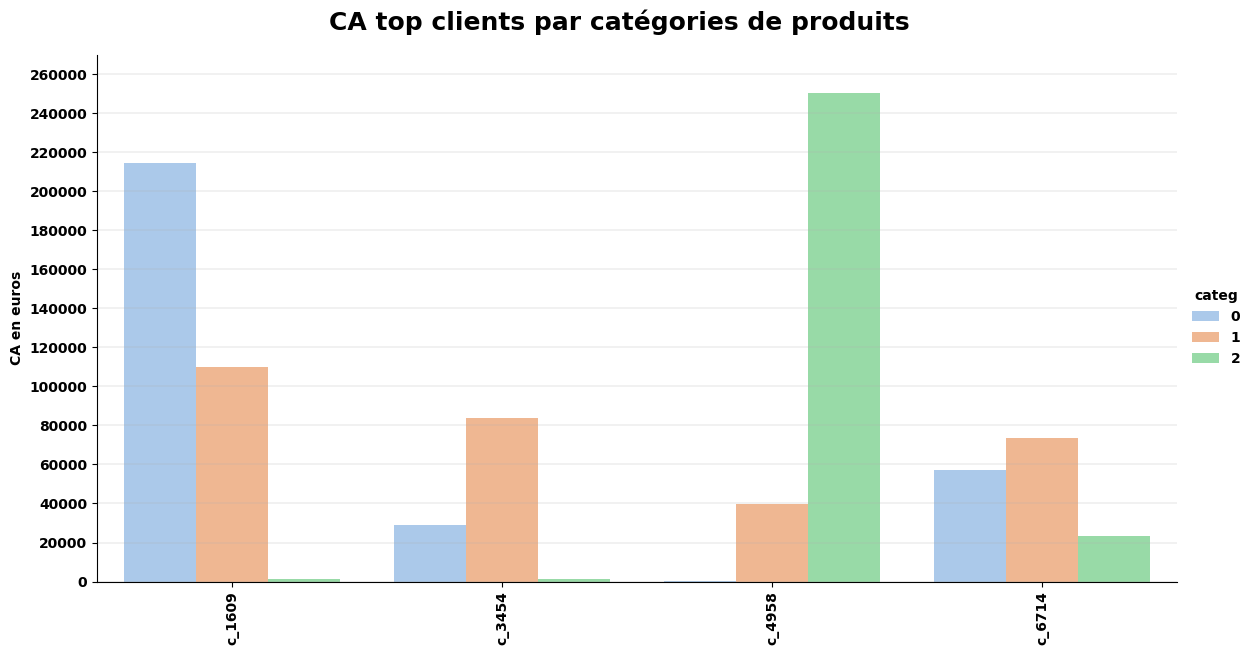

In [118]:
# Figure : CA top clients par categ
g = sns.catplot(
    data = top_clients_agg, 
    kind = "bar",
    x = 'client_id', 
    y = 'total_price', 
    hue = 'categ', 
    palette = "pastel", 
    height = 6, 
    aspect = 20/10, 
    legend_out = True
)
g.set_axis_labels("", "CA en euros")
g.fig.suptitle(
    'CA top clients par catégories de produits', 
    fontsize = 18,
    fontweight = 'bold',
    y = 1.05
  )
plt.ylim(0, 270_000)
plt.xticks(rotation = 90),
plt.yticks(np.arange(0, 270_000, step=20_000)),
plt.grid(axis = 'y', linewidth = 0.25)
plt.savefig('ca_top_categ.png', dpi=300, bbox_inches='tight')
plt.show()

In [119]:
top_clients_agg = top_clients.groupby(['annee_achat','client_id','sex','age']).agg(
    total_price = ('price', 'sum'),
    moy_price   = ('price', 'mean'), 
    nbre_produits = ('id_prod', 'nunique'), 
    nbre_ventes = ('quantite', 'sum'),
    nbre_visites = ('session_id', 'nunique')).reset_index()

top_clients_agg['frequence_achat'] = round(top_clients_agg.nbre_ventes/24,0)
top_clients_agg['panier_moyen'] = top_clients_agg['total_price'] / top_clients_agg['nbre_ventes']
top_clients_agg.sort_values(by='client_id')

,annee_achat,client_id,sex,age,total_price,moy_price,nbre_produits,nbre_ventes,nbre_visites,frequence_achat,panier_moyen
0,2021,c_1609,m,43,137155.90,12.608559,1835,10878,4608,453.0,12.608559
4,2022,c_1609,m,43,164358.02,12.883752,1665,12757,5508,532.0,12.883752
8,2023,c_1609,m,43,24525.97,12.570974,924,1951,881,81.0,12.570974
1,2021,c_3454,m,54,44354.60,16.637134,1005,2666,2207,111.0,16.637134
5,2022,c_3454,m,54,59999.26,16.853725,904,3560,2906,148.0,16.853725
9,2023,c_3454,m,54,9756.71,17.207601,366,567,458,24.0,17.207601
2,2021,c_4958,m,24,116987.31,56.028405,432,2088,1530,87.0,56.028405
6,2022,c_4958,m,24,150247.66,55.177253,409,2723,2021,113.0,55.177253
10,2023,c_4958,m,24,22992.06,55.941752,204,411,300,17.0,55.941752
3,2021,c_6714,f,55,61287.03,16.269453,1297,3767,1081,157.0,16.269453


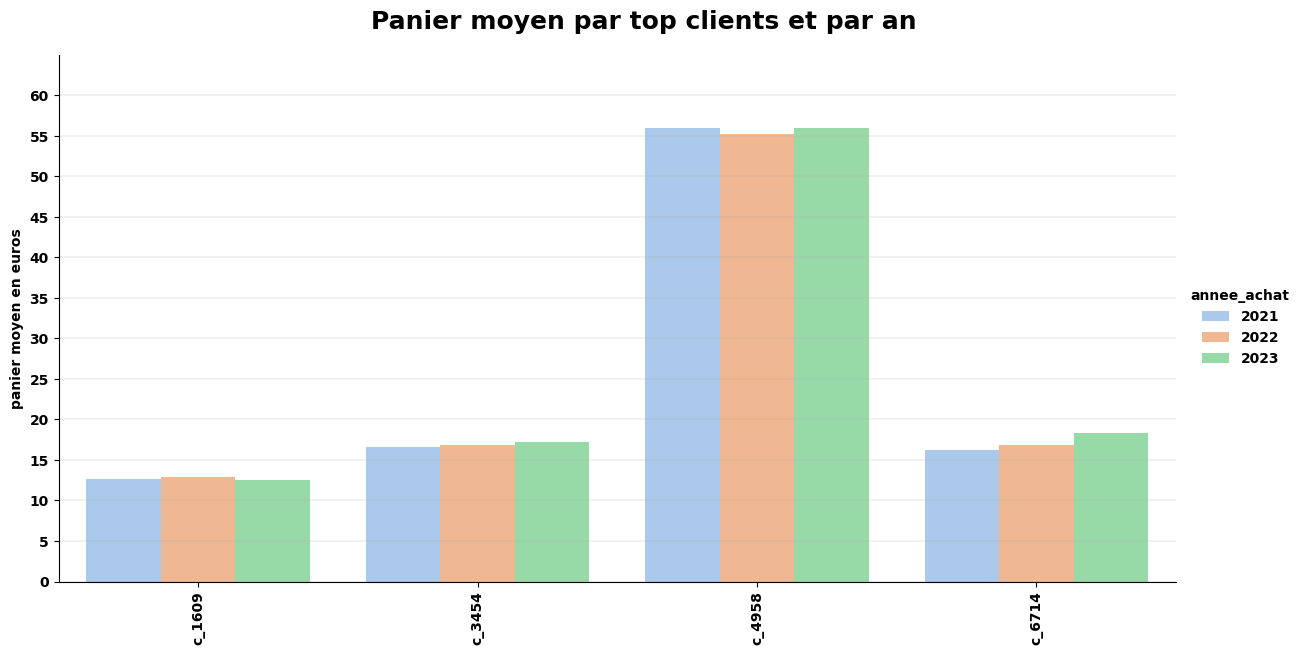

In [120]:
g = sns.catplot(
    data = top_clients_agg, 
    kind = "bar",
    x = 'client_id', 
    y = 'panier_moyen', 
    hue = 'annee_achat', 
    palette = "pastel", 
    height = 6, 
    aspect = 20/10, 
    legend_out = True
)
g.set_axis_labels("", "panier moyen en euros")
g.fig.suptitle(
    'Panier moyen par top clients et par an', 
    fontsize = 18,
    fontweight = 'bold',
    y = 1.05
  )
plt.ylim(0, 65)
plt.xticks(rotation = 90),
plt.yticks(np.arange(0, 65, step=5)),
plt.grid(axis = 'y', linewidth = 0.25)
plt.savefig('panier_top_an.png', dpi=300, bbox_inches='tight')
plt.show()

In [121]:
top_clients_recap = top_clients.groupby(['client_id','sex','age']).agg(
    total_price = ('price', 'sum'),
    moy_price   = ('price', 'mean'), 
    nbre_produits = ('id_prod', 'nunique'), 
    nbre_ventes = ('quantite', 'sum'),
    nbre_visites = ('session_id', 'nunique')).reset_index()

top_clients_recap['frequence_achat'] = round(top_clients_agg.nbre_ventes/24,0)
top_clients_recap['panier_moyen'] = top_clients_agg['total_price'] / top_clients_agg['nbre_ventes']
top_clients_recap.sort_values(by='total_price', ascending = False)

,client_id,sex,age,total_price,moy_price,nbre_produits,nbre_ventes,nbre_visites,frequence_achat,panier_moyen
0,c_1609,m,43,326039.89,12.742902,1922,25586,10997,453.0,12.608559
2,c_4958,m,24,290227.03,55.577754,470,5222,3851,87.0,56.028405
3,c_6714,f,55,153918.60,16.732101,1381,9199,2620,157.0,16.269453
1,c_3454,m,54,114110.57,16.798259,1093,6793,5571,111.0,16.637134
